In [1]:
# System
import os
import sys
sys.path.append('/home/helfrech/Tools/Toolbox/utils')
sys.path.append('..')

# Maths
import numpy as np
from scipy.stats import pearsonr

# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, ConnectionPatch
from matplotlib.patches import Rectangle
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, BoundaryNorm, DivergingNorm
from matplotlib.colors import ListedColormap

# ML
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.neighbors import KernelDensity
from sklearn.metrics import mean_squared_error
from kernels import sqeuclidean_distances

# Atoms
from ase.io import read

# Utilities
import h5py
import json
from tools import load_json
import project_utils as utils

# Import COSMO style toolkit
import cosmoplot.colorbars as cosmocbars
import cosmoplot.utils as cosmoutils
import cosmoplot.style as cosmostyle

cosmostyle.set_style('article')
color_list = cosmostyle.color_cycle

# Analysis setup

In [2]:
# Load SOAP cutoffs
soap_hyperparameters = load_json('../../Processed_Data/soap_hyperparameters.json')   
cutoffs = soap_hyperparameters['interaction_cutoff']

In [3]:
# Load train and test indices
deem_train_idxs = np.loadtxt('../../Processed_Data/DEEM_330k/svm_train.idxs', dtype=int)
deem_test_idxs = np.loadtxt('../../Processed_Data/DEEM_330k/svm_test.idxs', dtype=int)

iza_train_idxs = np.loadtxt('../../Processed_Data/IZA_230/svm_train.idxs', dtype=int)
iza_test_idxs = np.loadtxt('../../Processed_Data/IZA_230/svm_test.idxs', dtype=int)

In [4]:
# Load indices of DEEM 10k set in 330k
idxs_deem_10k = np.loadtxt('../../Processed_Data/DEEM_330k/deem_10k.idxs', dtype=int)

In [5]:
# Load cantons for IZA and Deem
iza_cantons = np.loadtxt('../../Raw_Data/IZA_230/cantons_compositions.dat', usecols=1, dtype=int)
deem_cantons_2 = np.loadtxt('../../Processed_Data/DEEM_330k/Data/cantons_2-class.dat', dtype=int)
deem_cantons_4 = np.loadtxt('../../Processed_Data/DEEM_330k/Data/cantons_4-class.dat', dtype=int)
deem_cantons = deem_cantons_4
n_deem = len(deem_cantons_2)

In [6]:
# Build set of "master" canton labels for the train set
train_cantons = {}

train_cantons[4] = np.concatenate((
    iza_cantons[iza_train_idxs], 
    deem_cantons_4[deem_train_idxs]
))

train_cantons[2] = np.concatenate((
    np.ones(len(iza_train_idxs), dtype=int),
    deem_cantons_2[deem_train_idxs]
))

train_class_weights = {
    n_cantons: utils.balanced_class_weights(train_cantons[n_cantons]) for n_cantons in (2, 4)
}

# Build set of "master" canton labels for the test set
test_cantons = {}

test_cantons[4] = np.concatenate((
    iza_cantons[iza_test_idxs], 
    deem_cantons_4[deem_test_idxs]
))

test_cantons[2] = np.concatenate((
    np.ones(len(iza_test_idxs), dtype=int),
    deem_cantons_2[deem_test_idxs]
))

test_class_weights = {
    n_cantons: utils.balanced_class_weights(test_cantons[n_cantons]) for n_cantons in (2, 4)
}

In [7]:
class_names = {
    2: ['IZA', 'DEEM'],
    4: ['IZA1', 'IZA2', 'IZA3', 'DEEM']

}

ticklabels = {
    2: ['IZA', 'DEEM'],
    4: ['IZA1', 'IZA2', 'IZA3', 'DEEM']
}

In [8]:
# Linear model setup
n_species = 2
group_names = {
    'power': ['OO', 'OSi', 'SiSi', 'OO+OSi', 'OO+SiSi', 'OSi+SiSi', 'OO+OSi+SiSi'], 
    'radial': ['O', 'Si', 'O+Si']
}
df_types = ['OvR', 'OvO']

In [9]:
deem_name = 'DEEM_330k'
iza_name = 'IZA_230'
deem_dir = f'../../Processed_Data/{deem_name}/Data'
iza_dir = f'../../Processed_Data/{iza_name}/Data'

## Plotting

In [10]:
mixing = ''

##### OvR #####
===== 3.5 | 4-Class | Power | OO =====


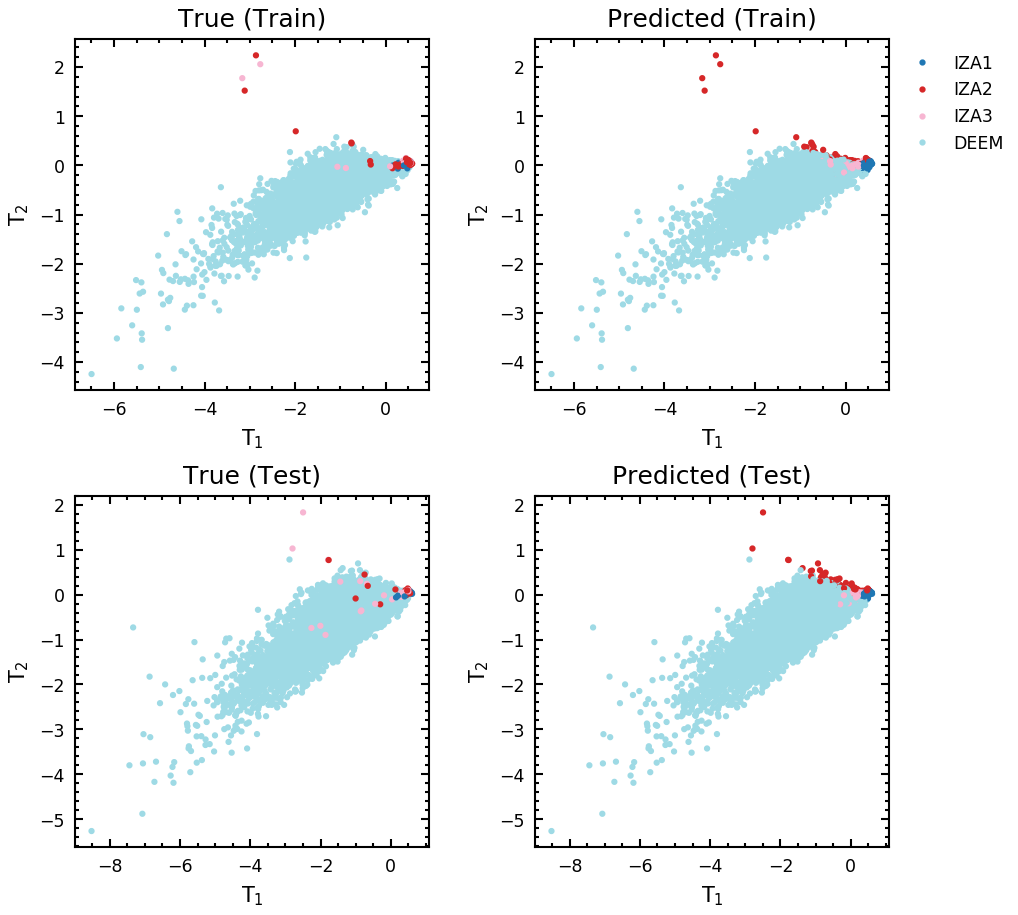

===== 3.5 | 4-Class | Power | OSi =====


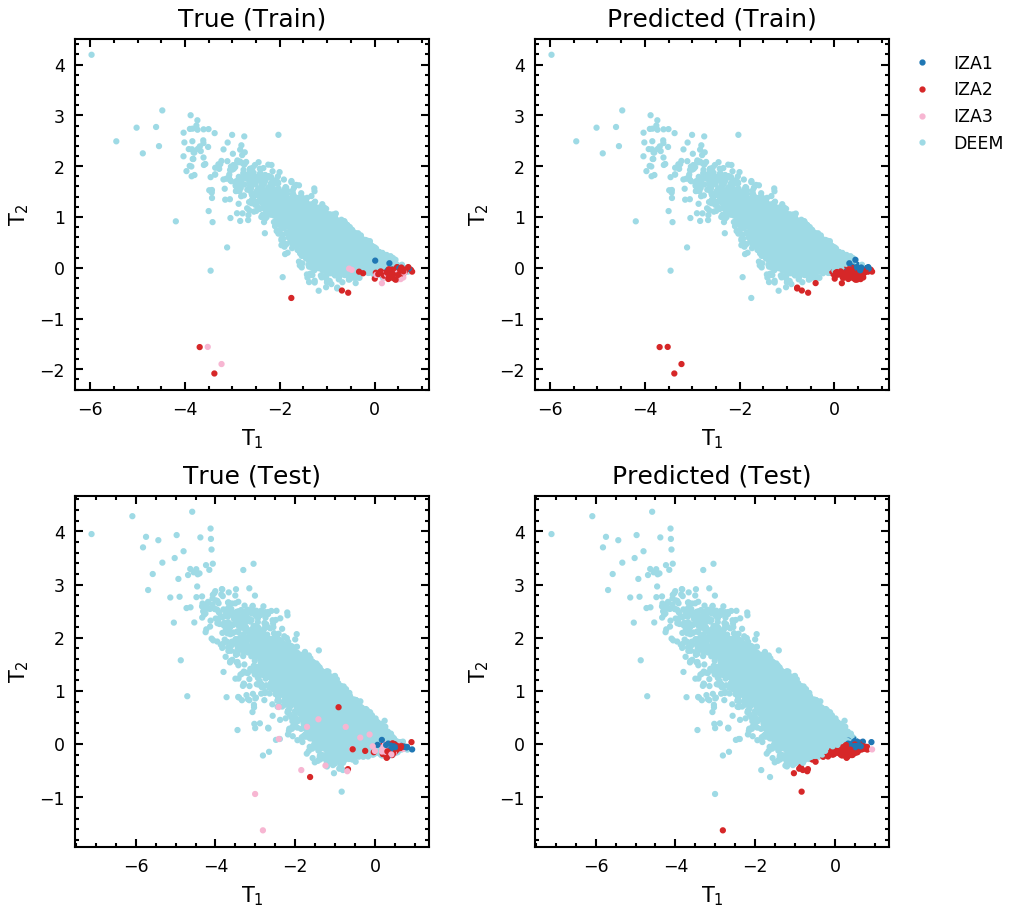

===== 3.5 | 4-Class | Power | SiSi =====


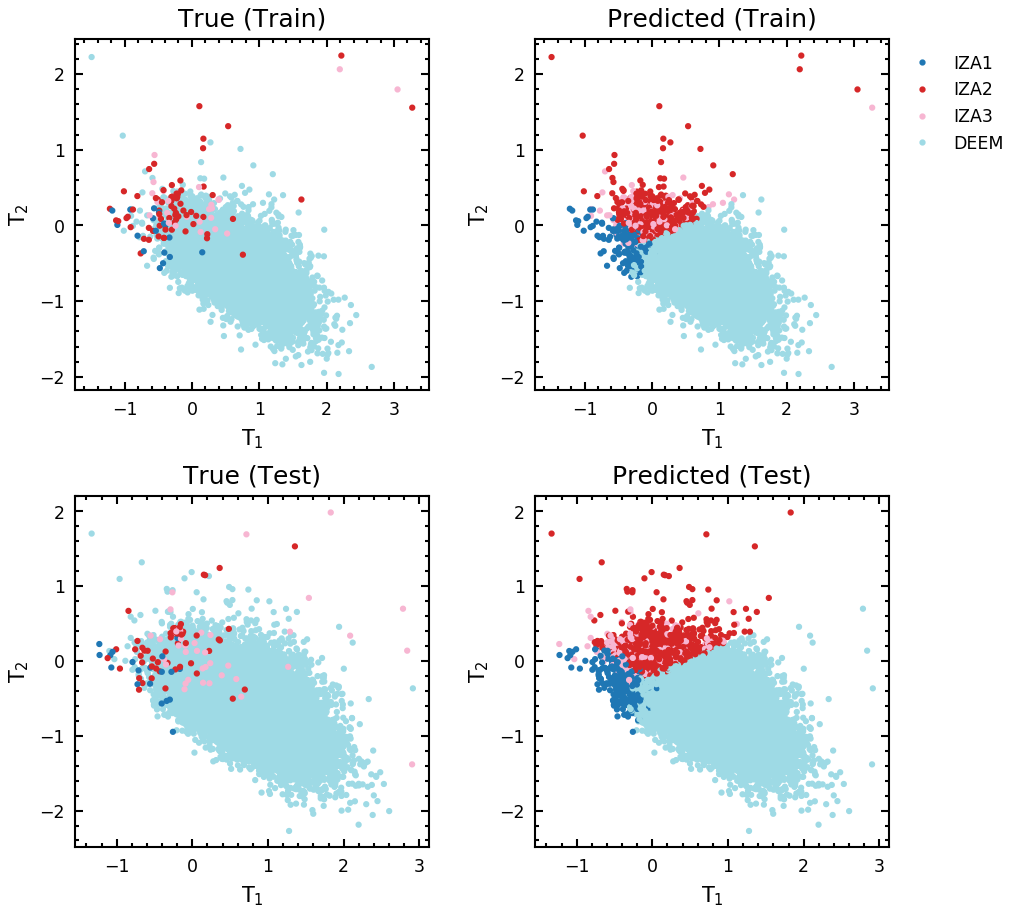

===== 3.5 | 4-Class | Power | OO+OSi =====


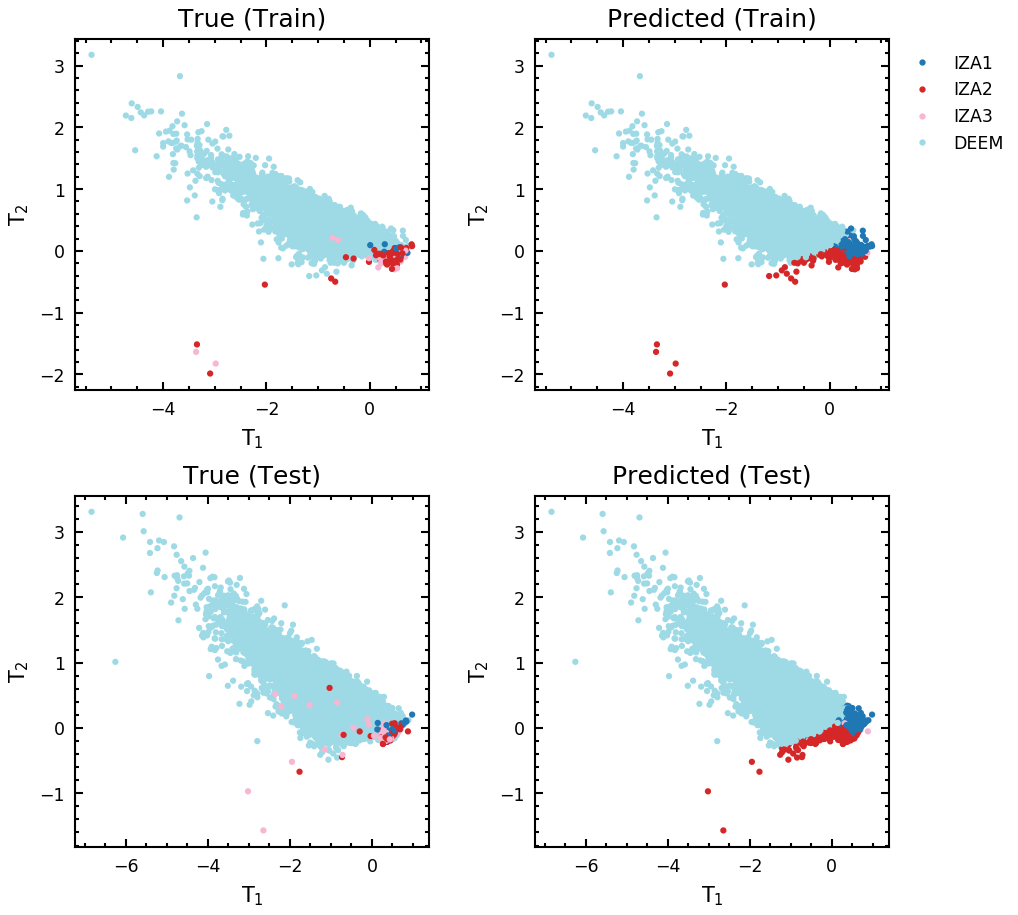

===== 3.5 | 4-Class | Power | OO+SiSi =====


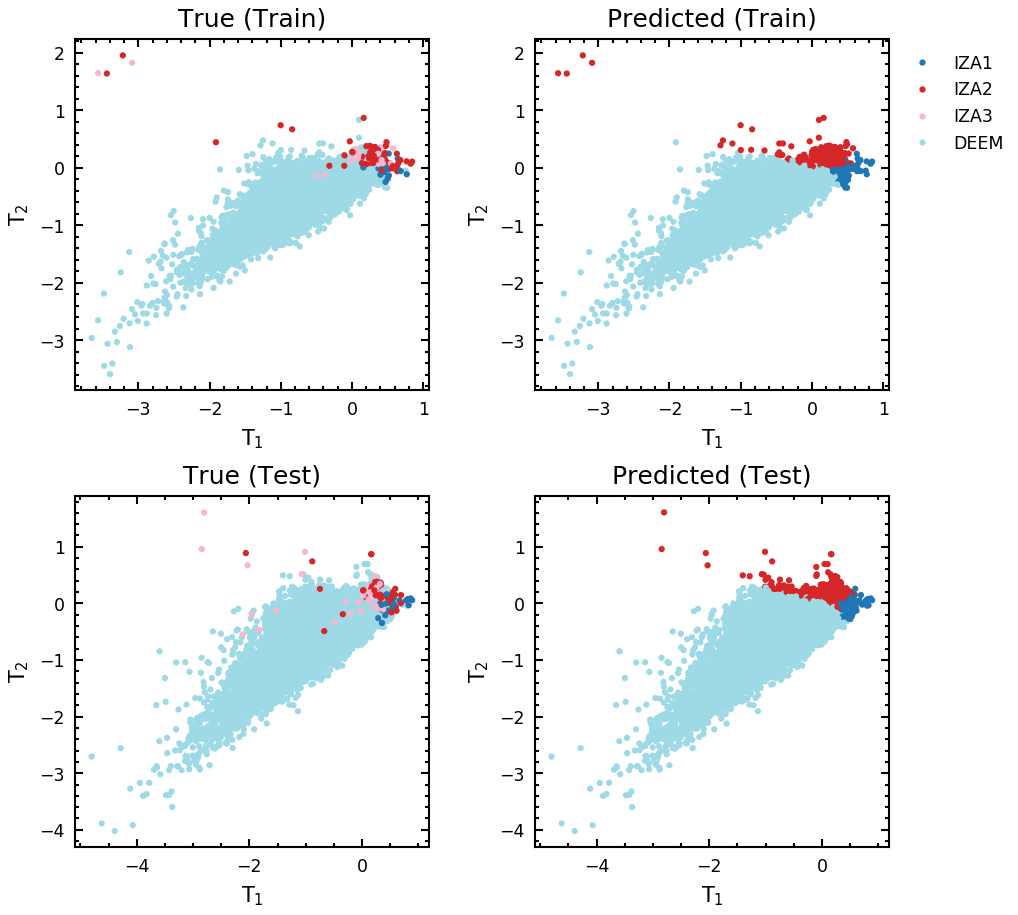

===== 3.5 | 4-Class | Power | OSi+SiSi =====


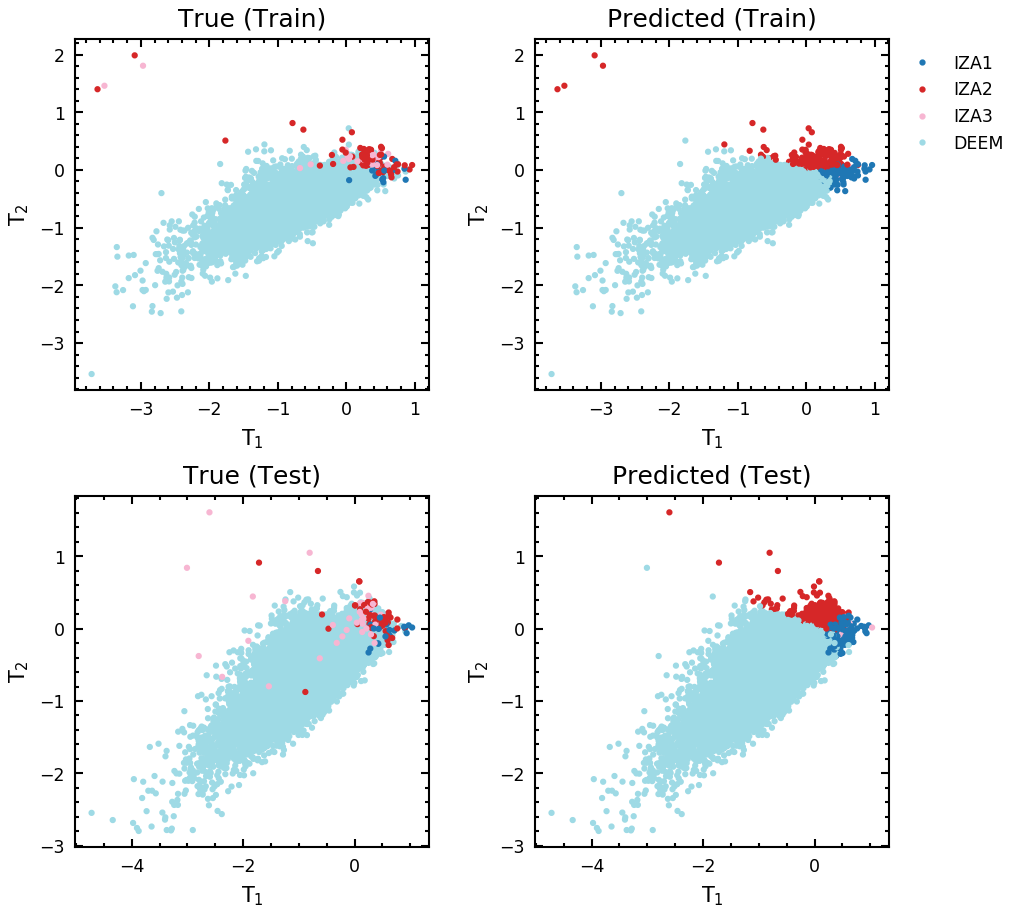

===== 3.5 | 4-Class | Power | OO+OSi+SiSi =====


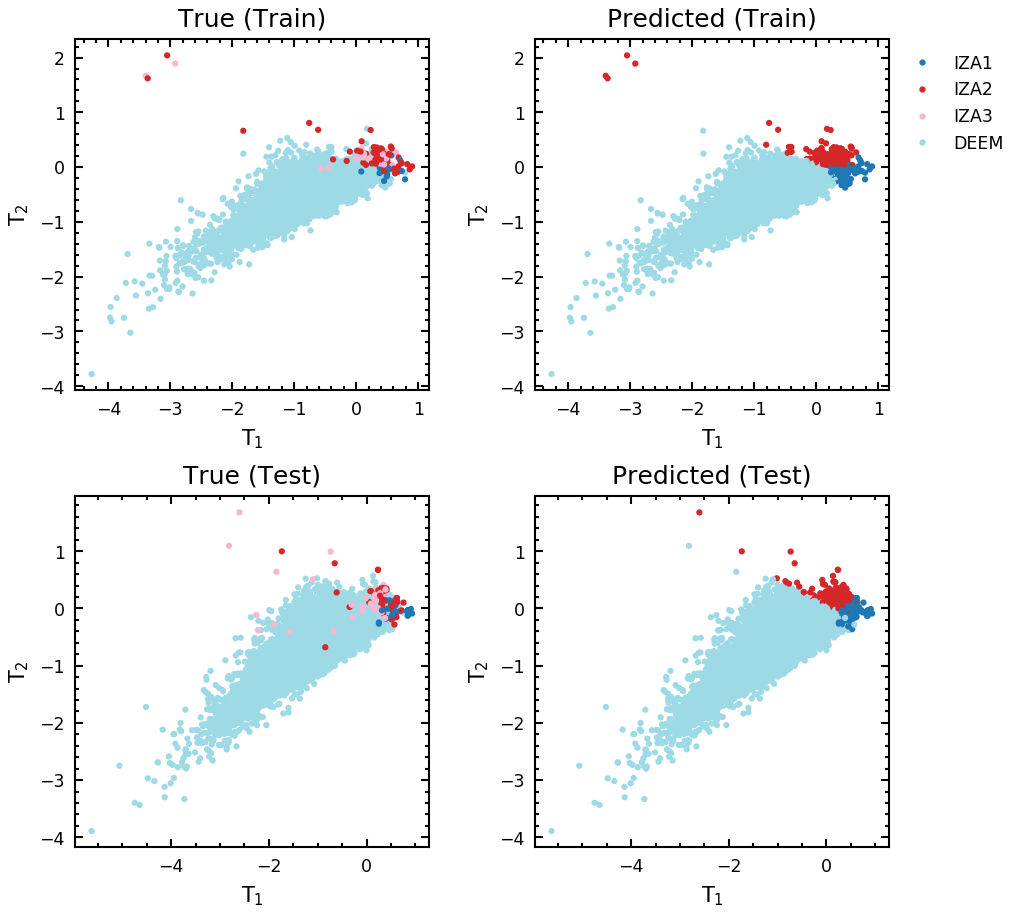

===== 3.5 | 4-Class | Radial | O =====


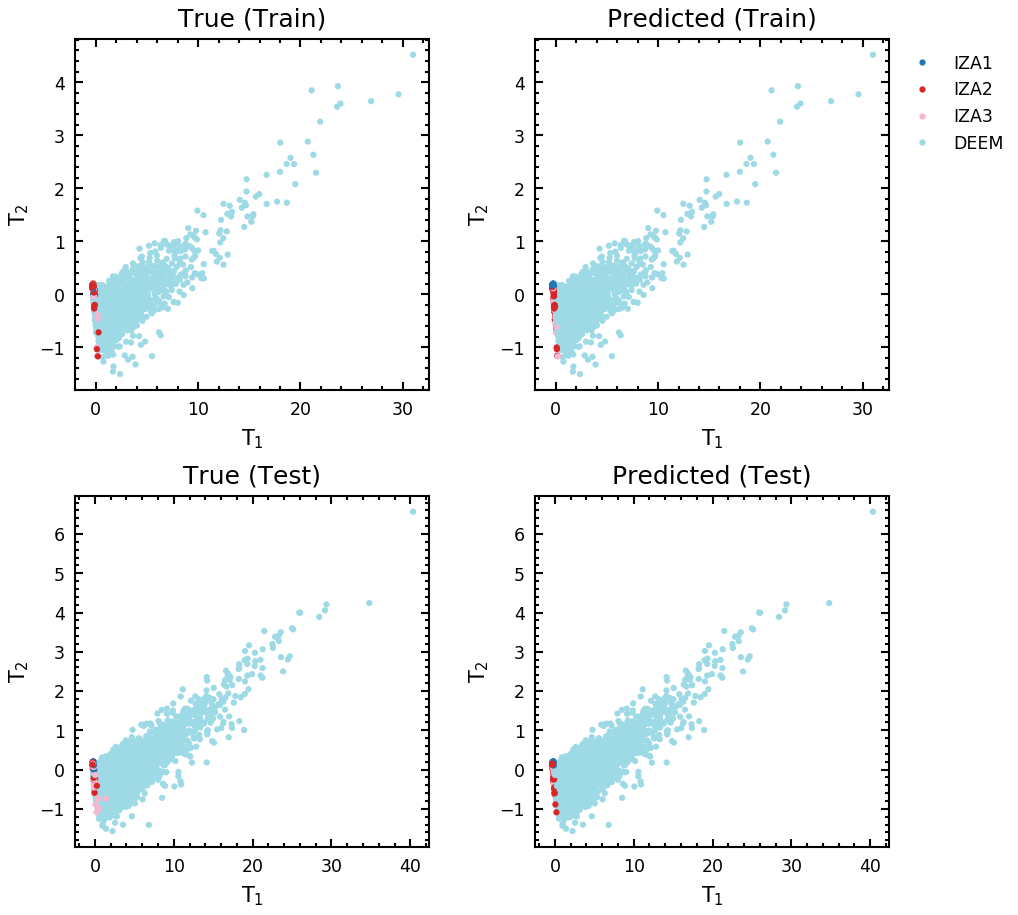

===== 3.5 | 4-Class | Radial | Si =====


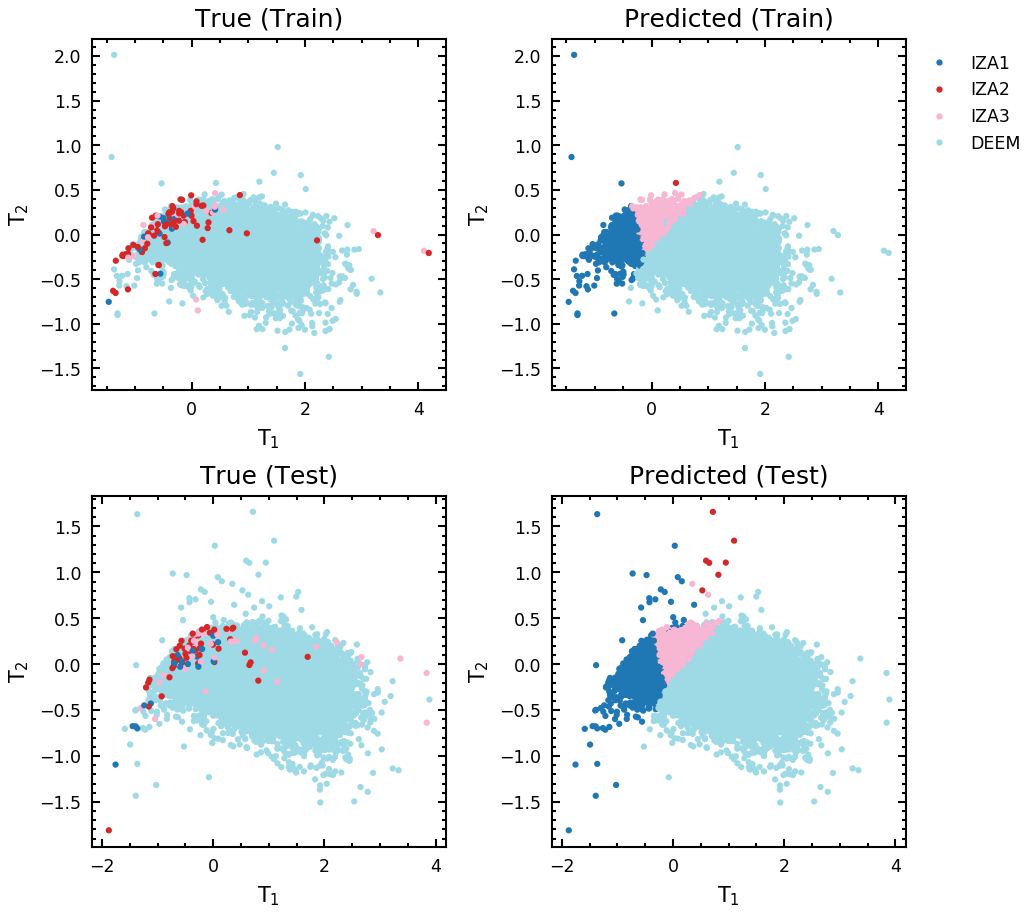

===== 3.5 | 4-Class | Radial | O+Si =====


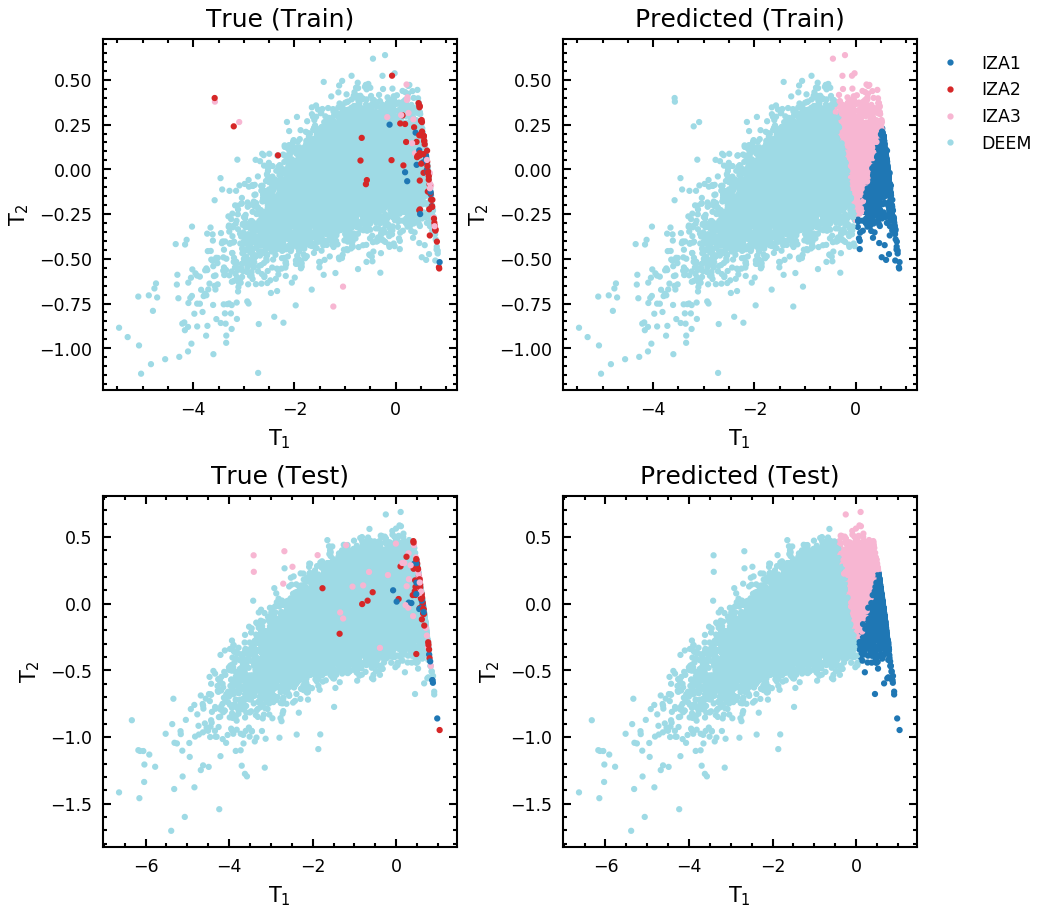

===== 6.0 | 4-Class | Power | OO =====


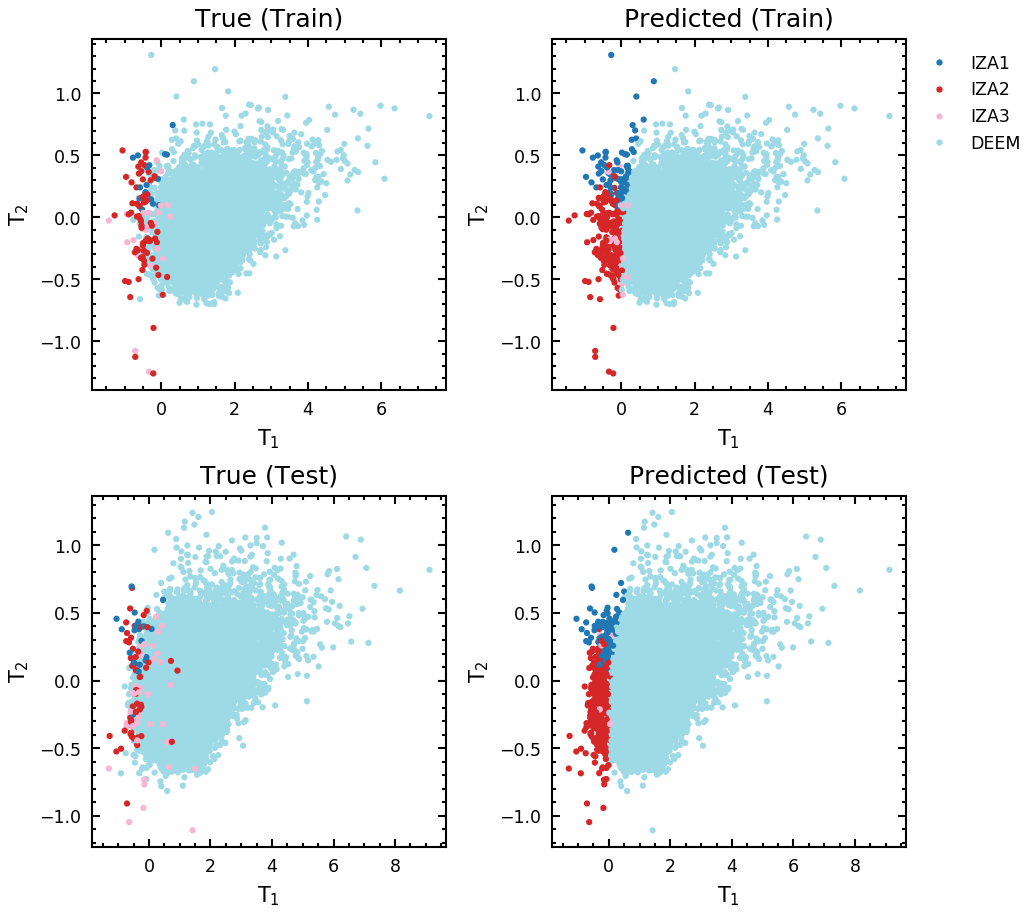

===== 6.0 | 4-Class | Power | OSi =====


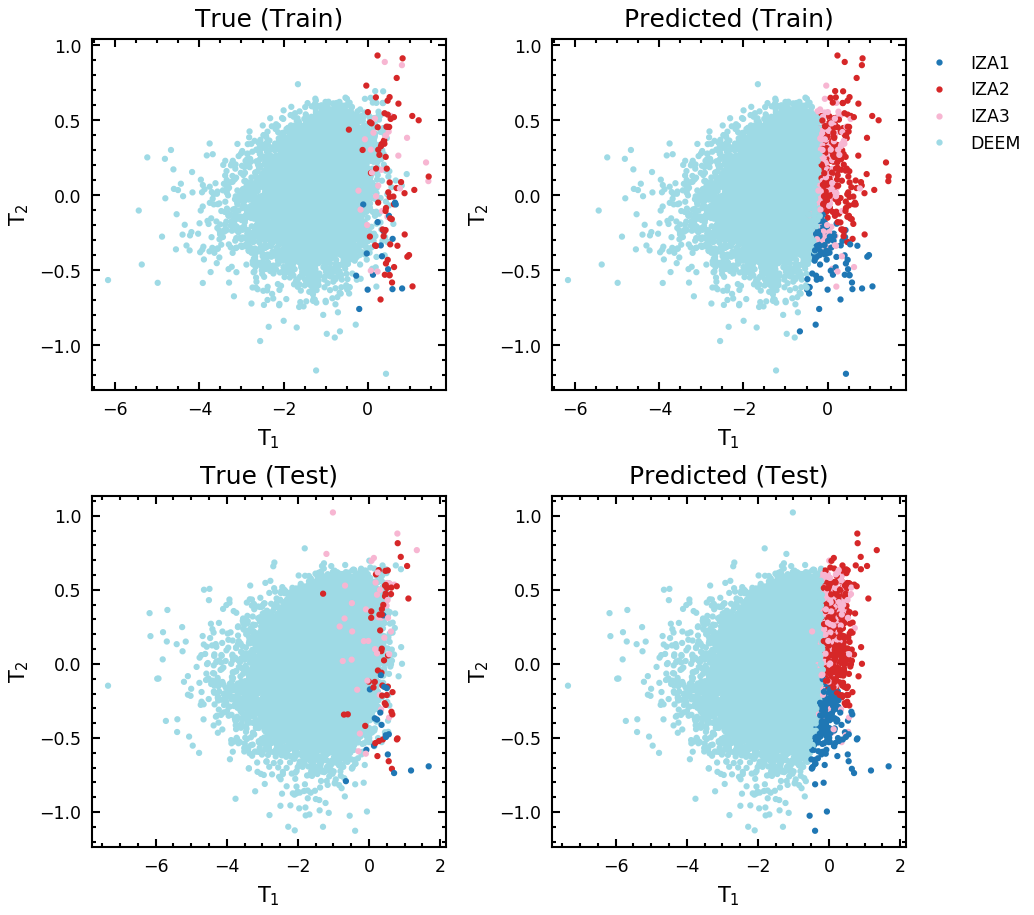

===== 6.0 | 4-Class | Power | SiSi =====


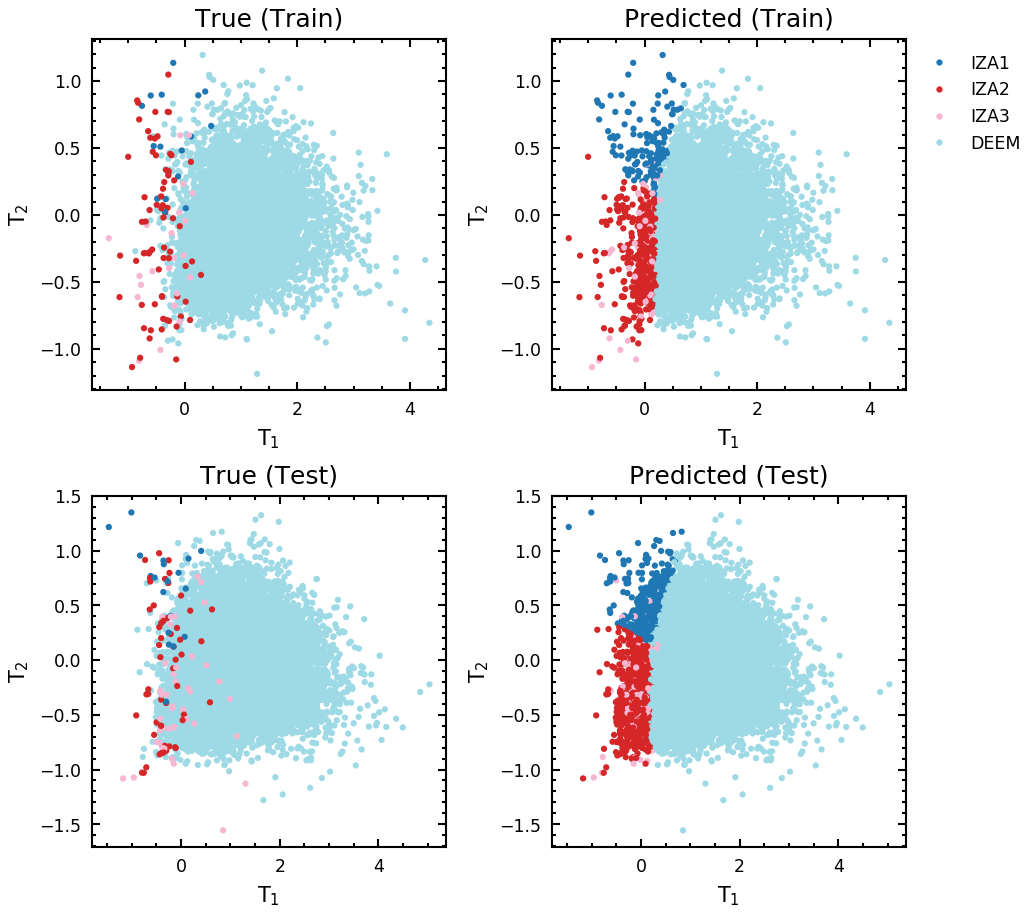

===== 6.0 | 4-Class | Power | OO+OSi =====


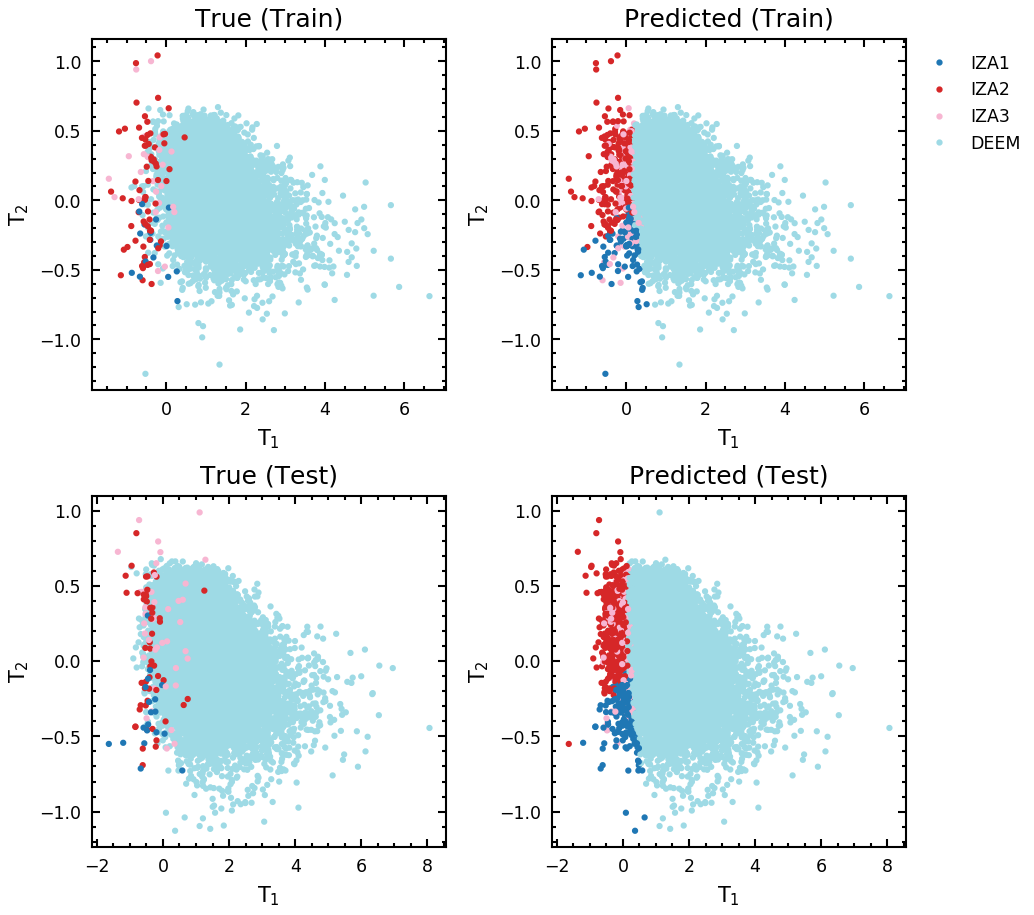

===== 6.0 | 4-Class | Power | OO+SiSi =====


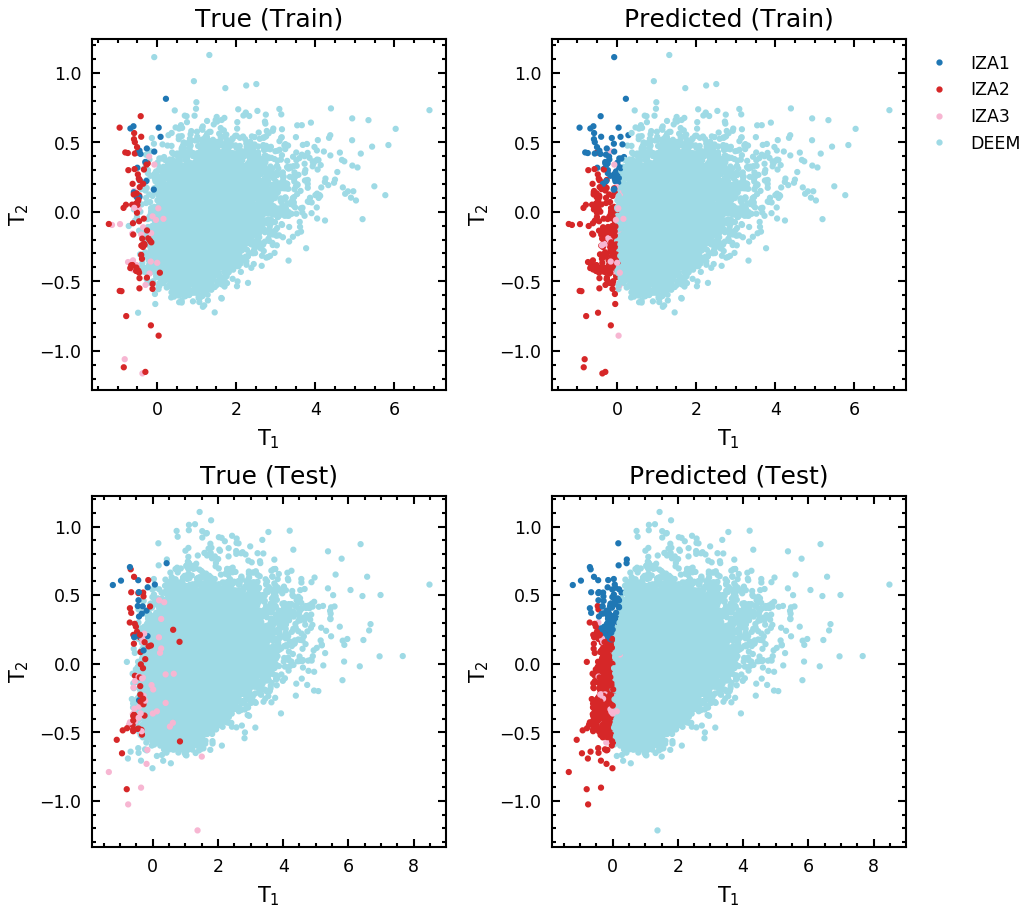

===== 6.0 | 4-Class | Power | OSi+SiSi =====


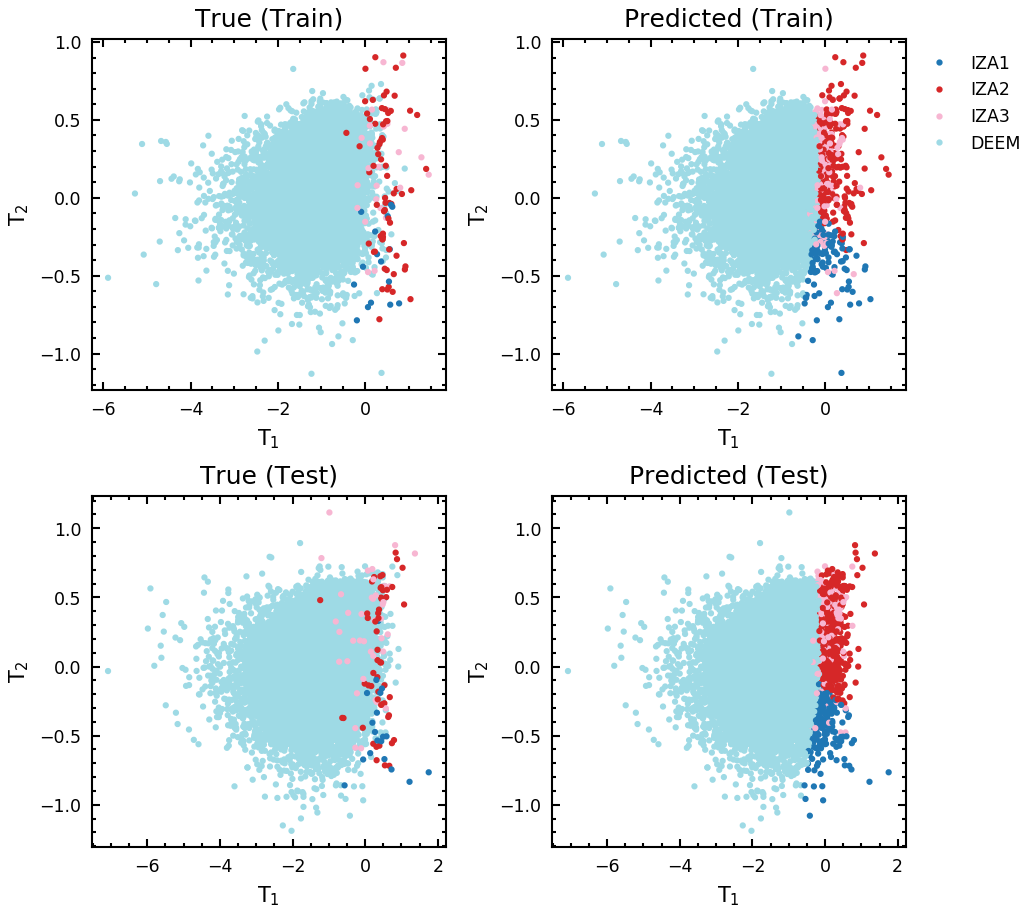

===== 6.0 | 4-Class | Power | OO+OSi+SiSi =====


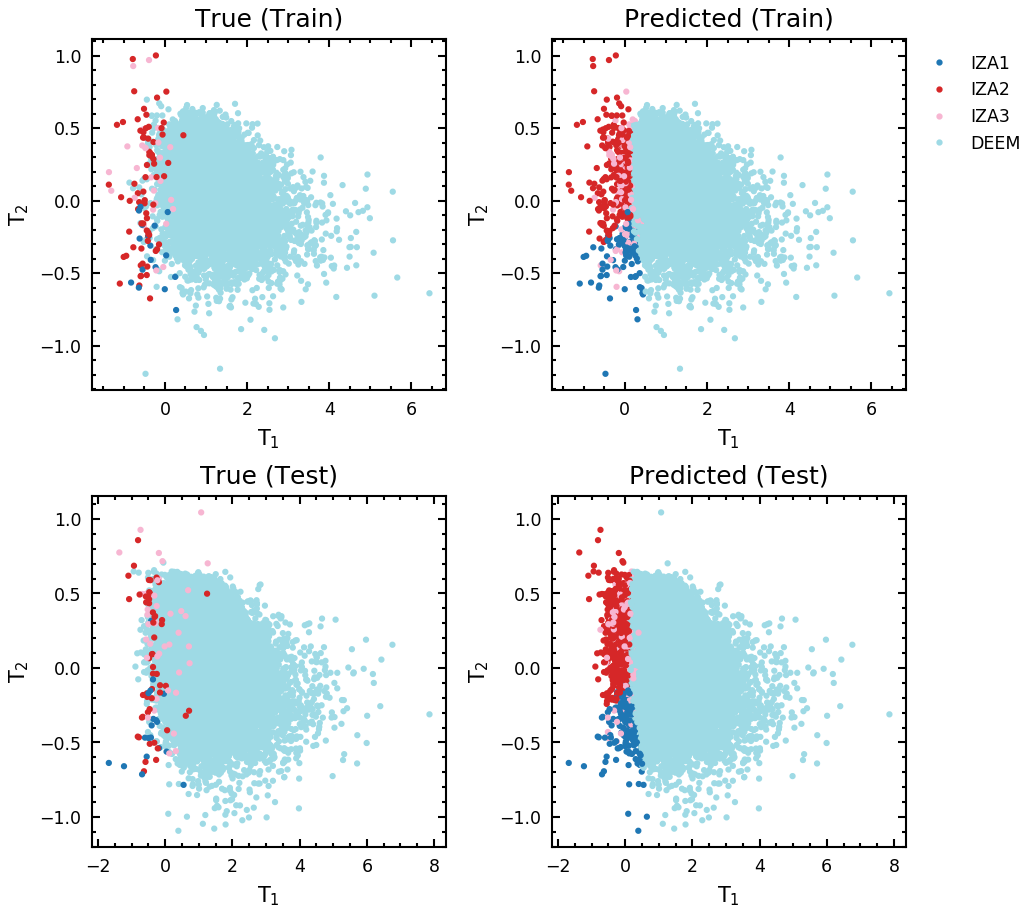

===== 6.0 | 4-Class | Radial | O =====


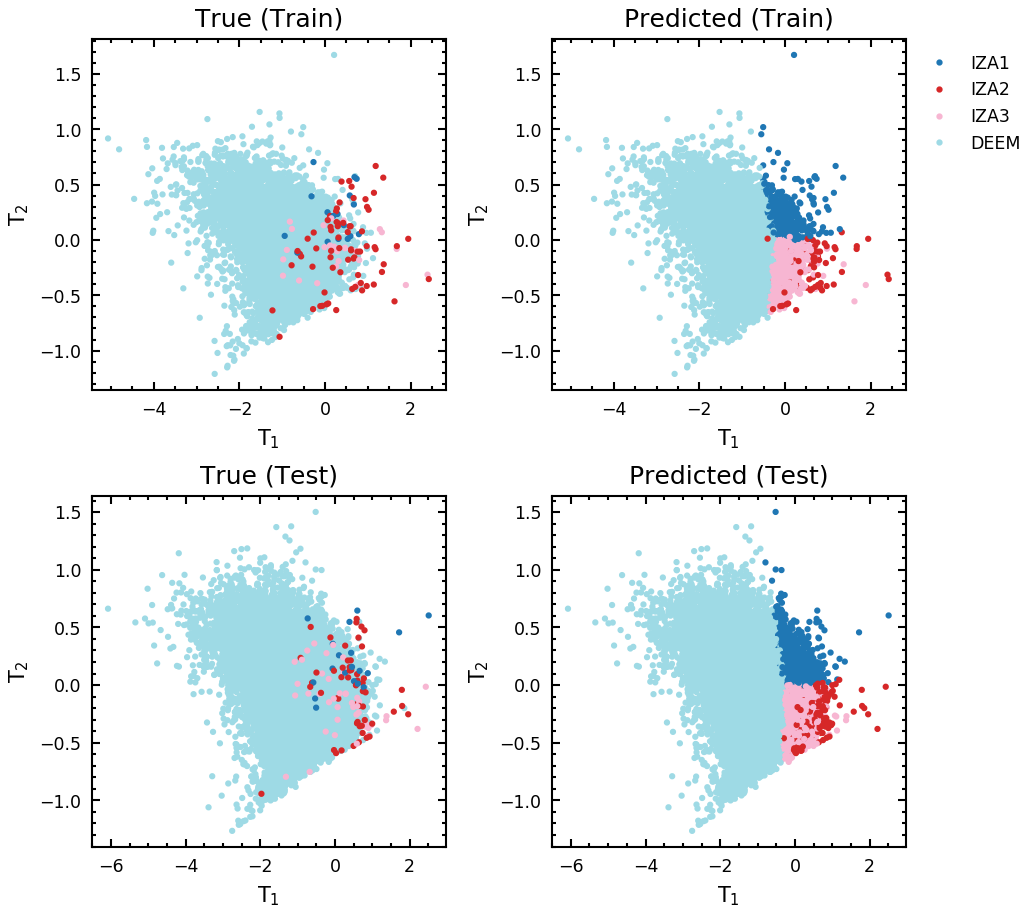

===== 6.0 | 4-Class | Radial | Si =====


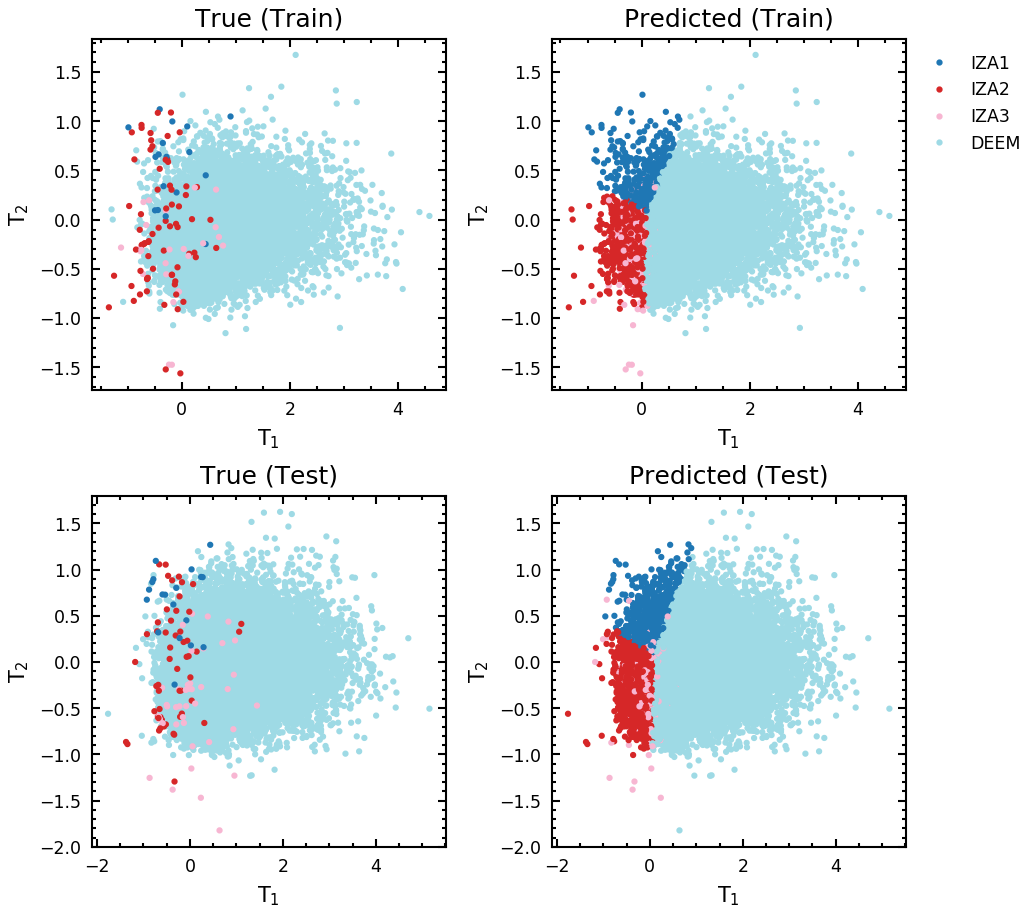

===== 6.0 | 4-Class | Radial | O+Si =====


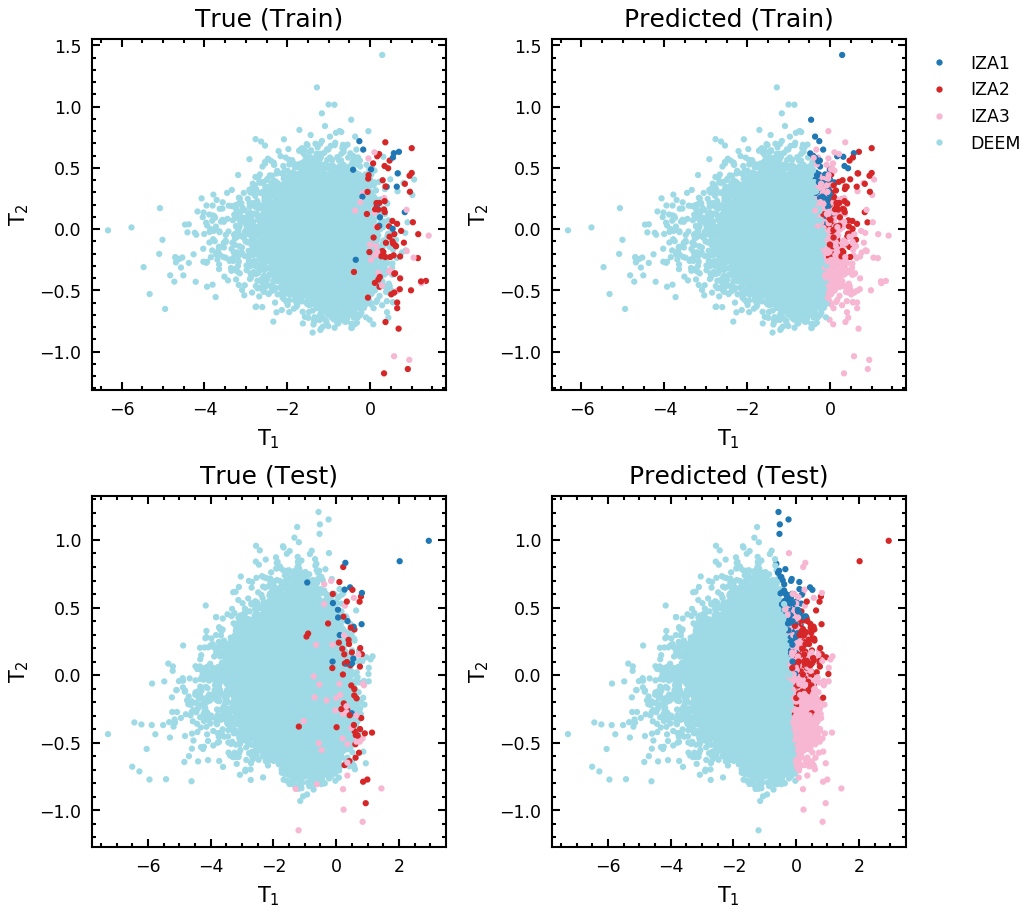

##### OvO #####
===== 3.5 | 4-Class | Power | OO =====


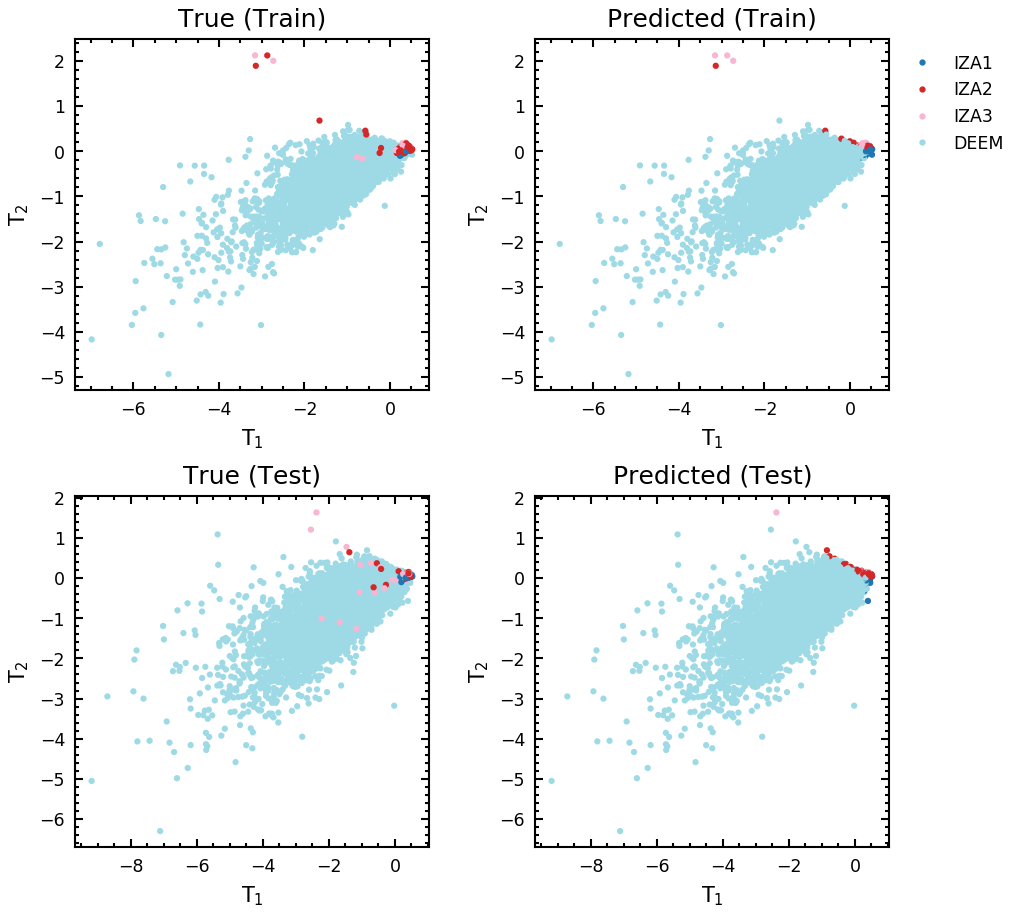

===== 3.5 | 4-Class | Power | OSi =====


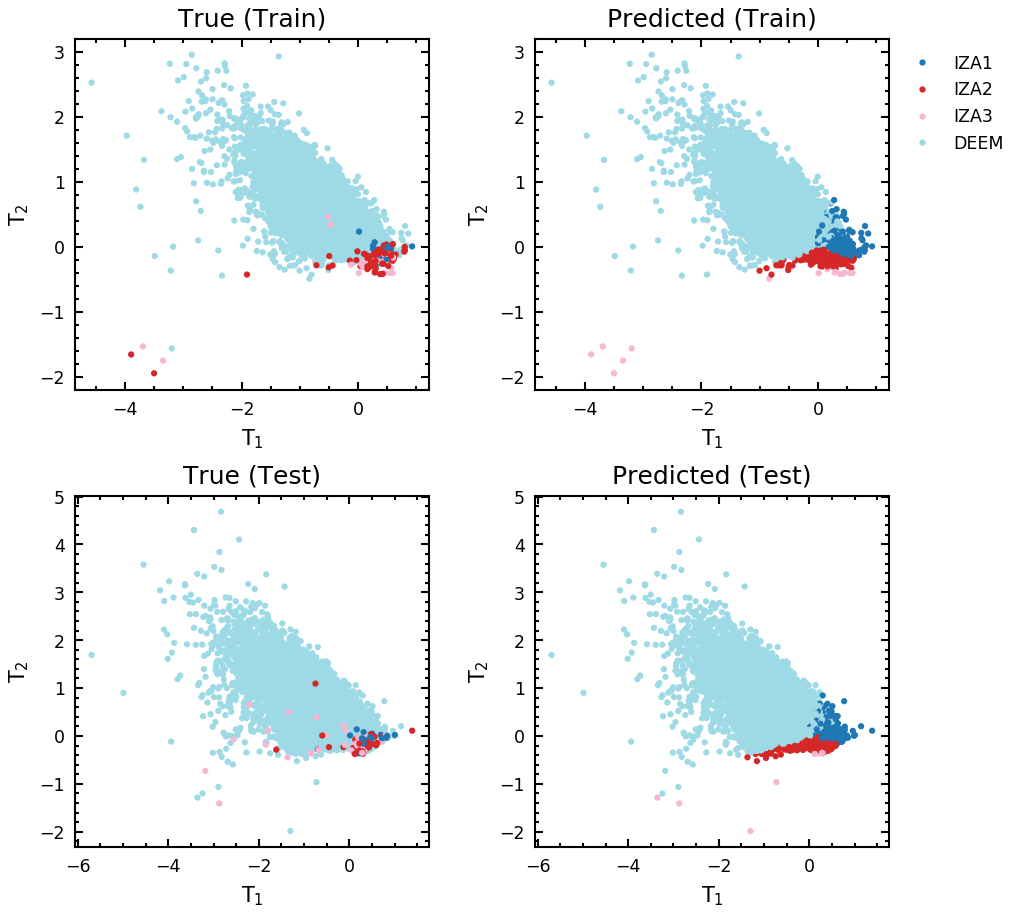

===== 3.5 | 4-Class | Power | SiSi =====


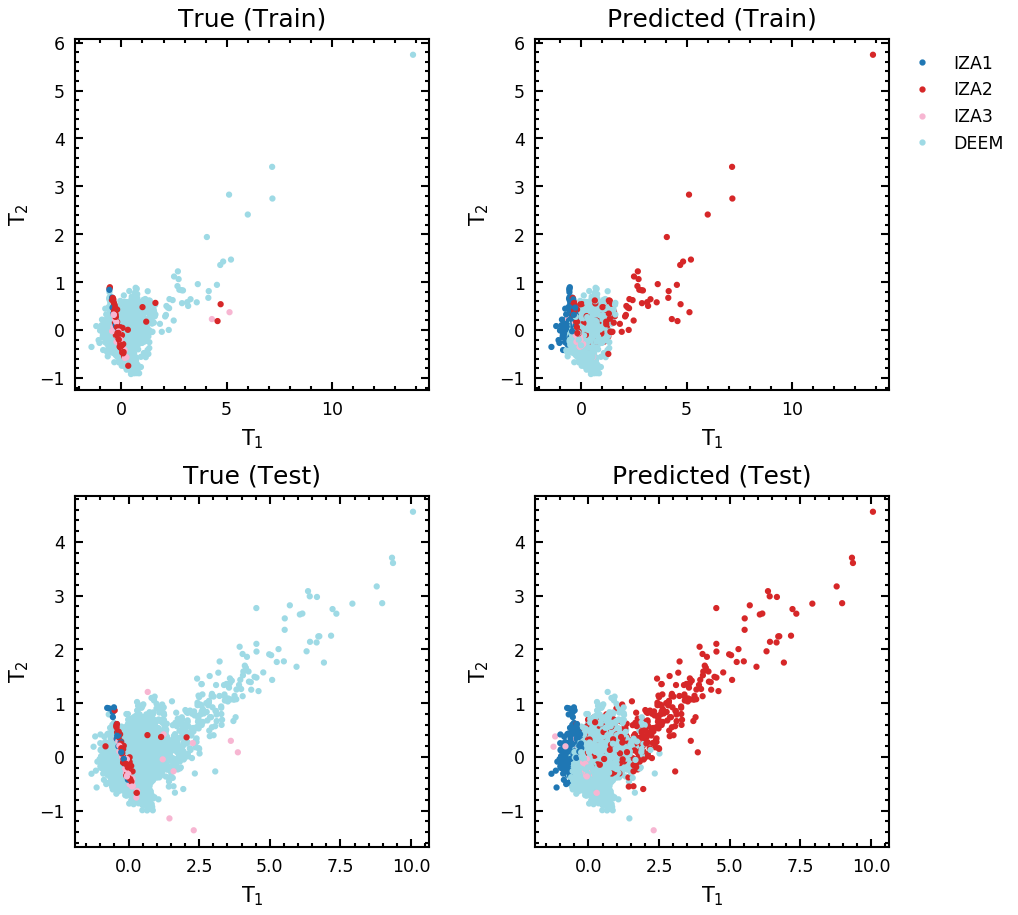

===== 3.5 | 4-Class | Power | OO+OSi =====


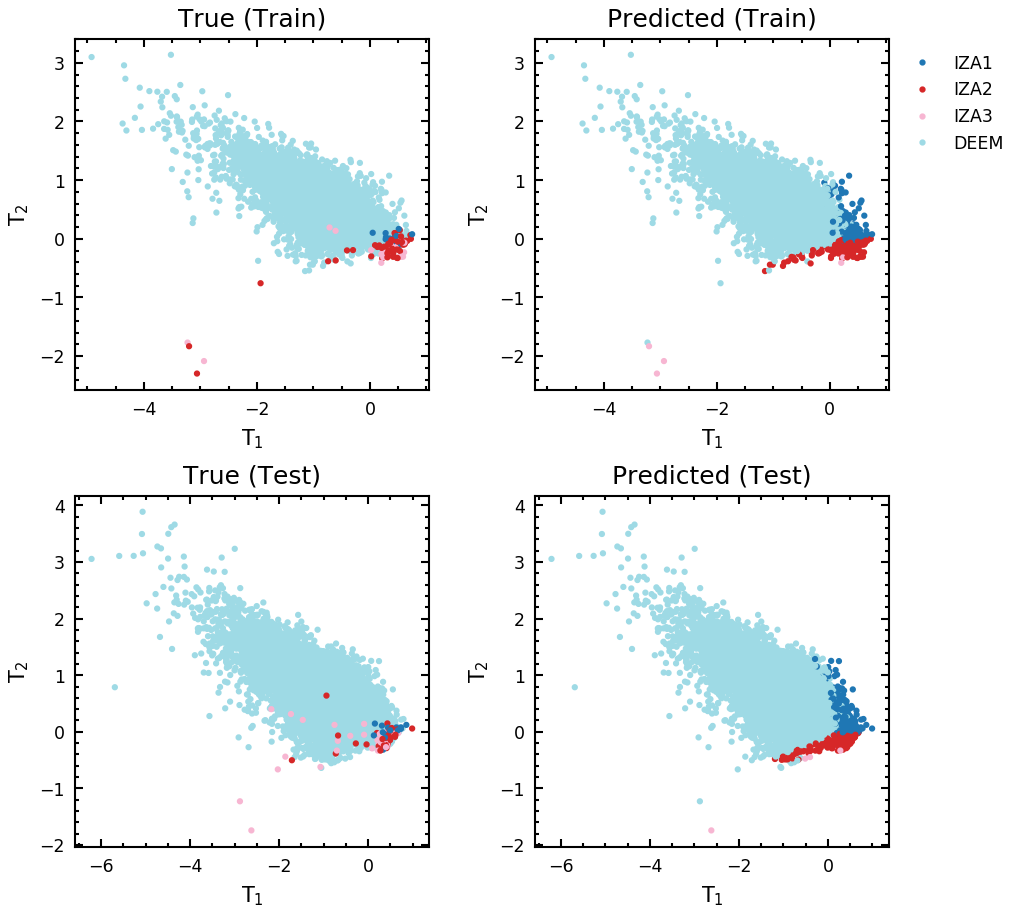

===== 3.5 | 4-Class | Power | OO+SiSi =====


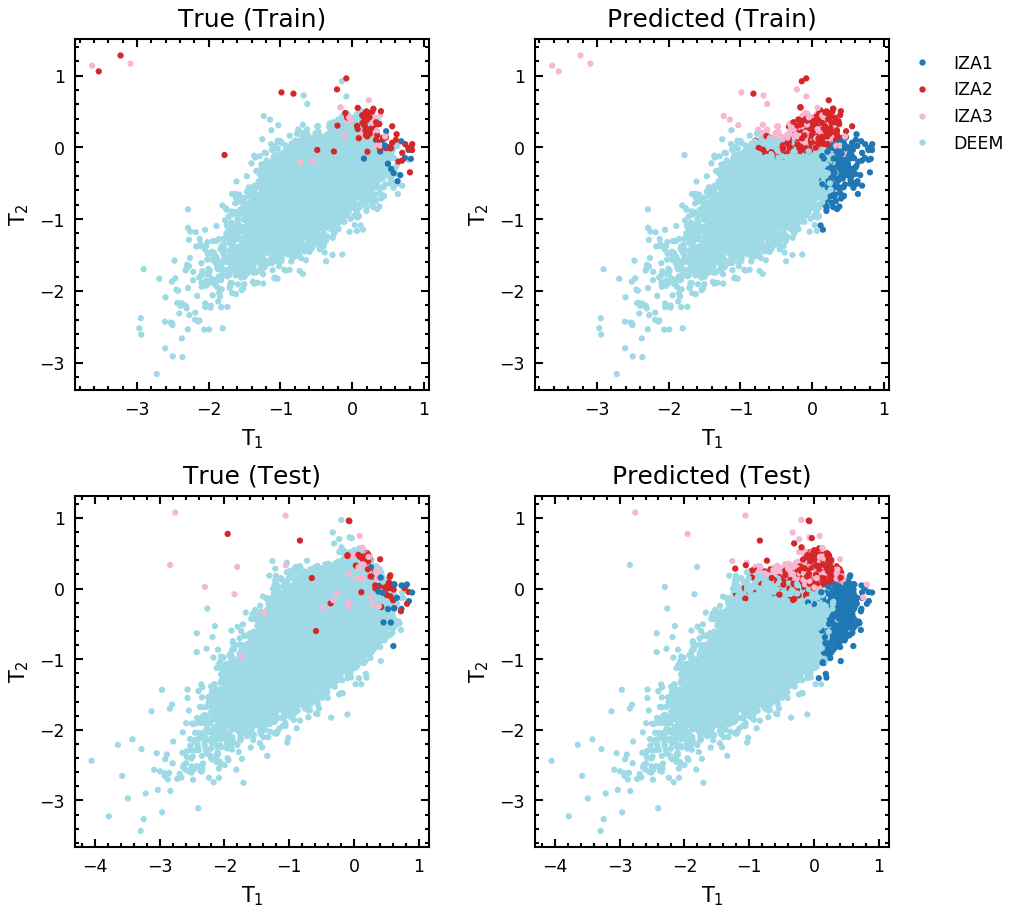

===== 3.5 | 4-Class | Power | OSi+SiSi =====


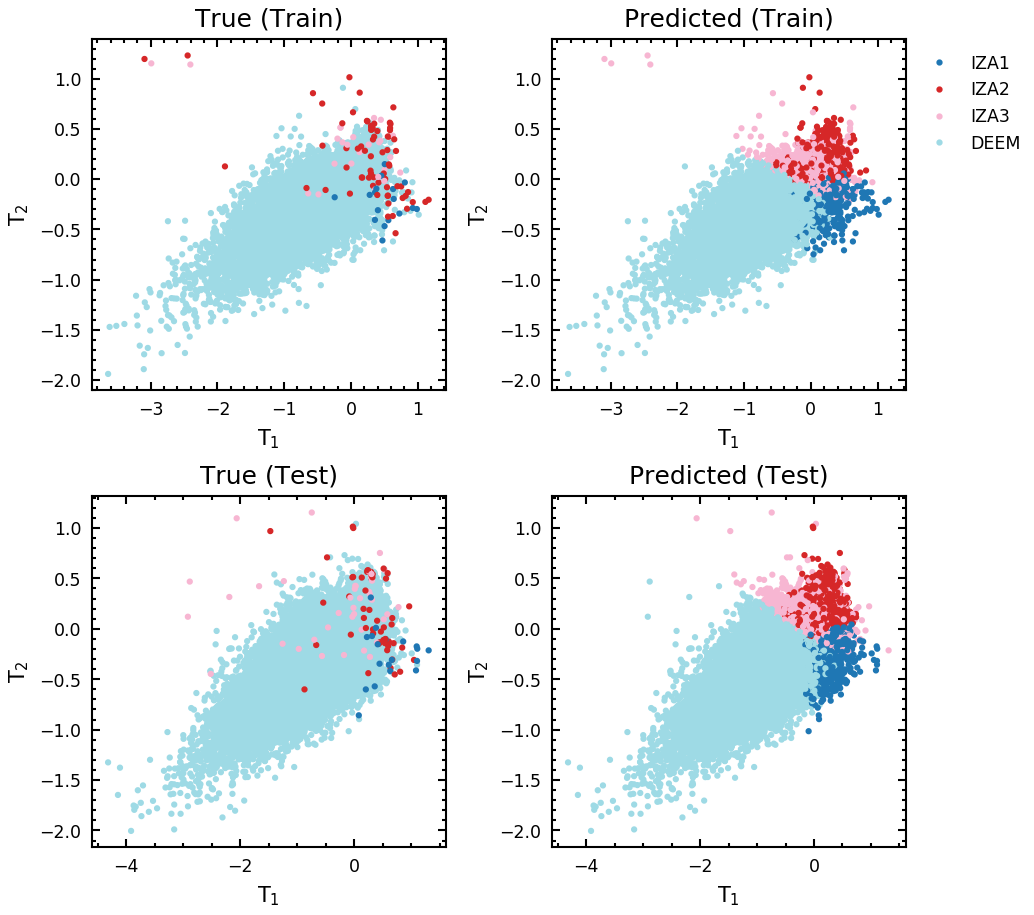

===== 3.5 | 4-Class | Power | OO+OSi+SiSi =====


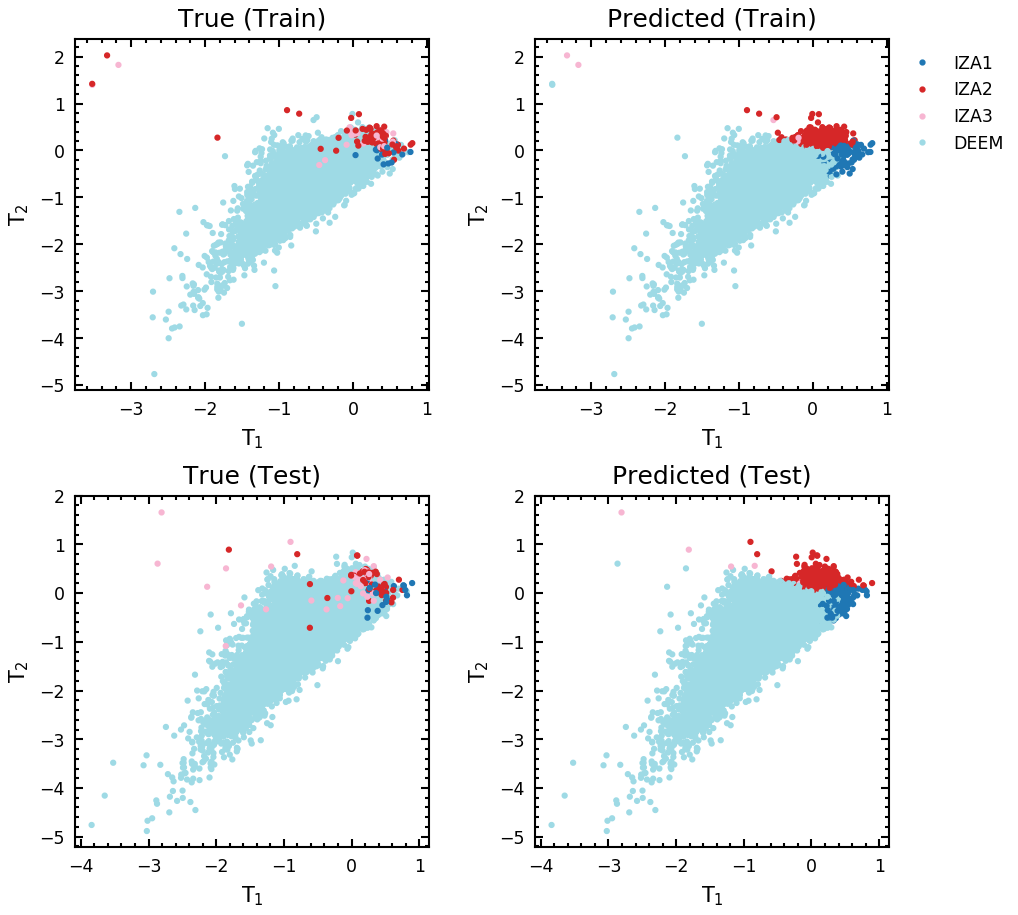

===== 3.5 | 4-Class | Radial | O =====


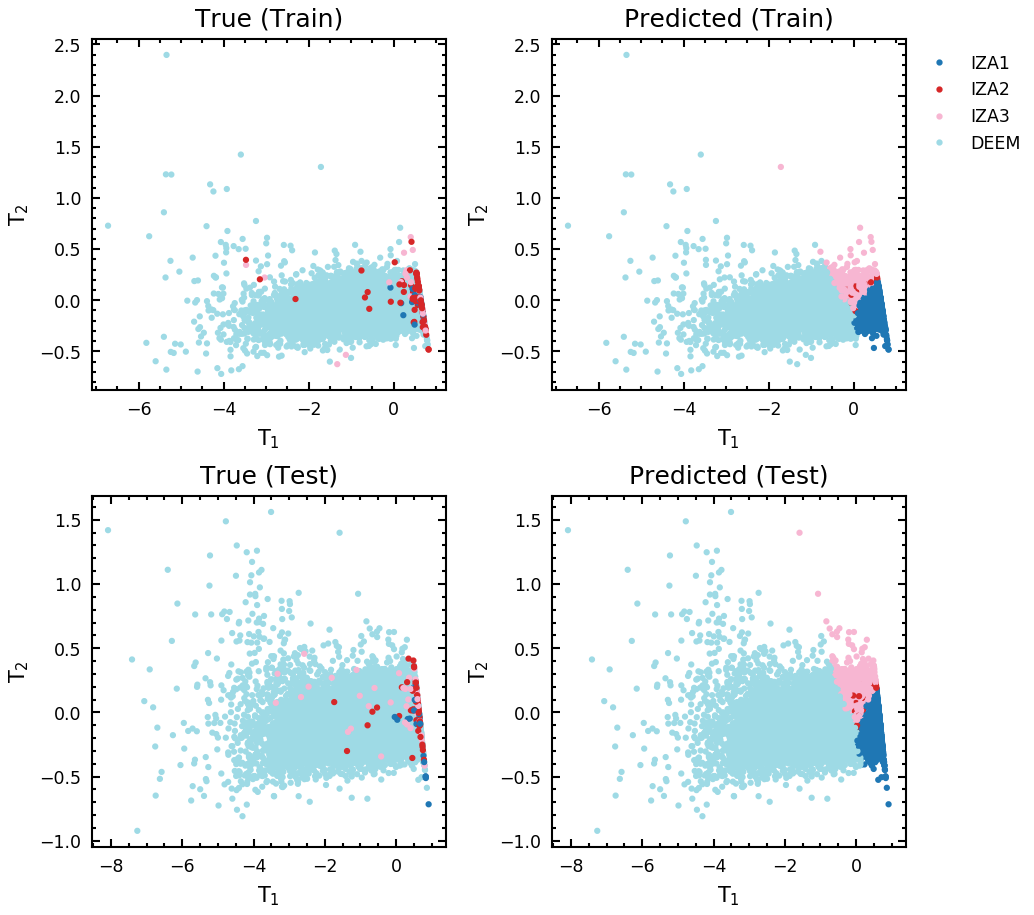

===== 3.5 | 4-Class | Radial | Si =====


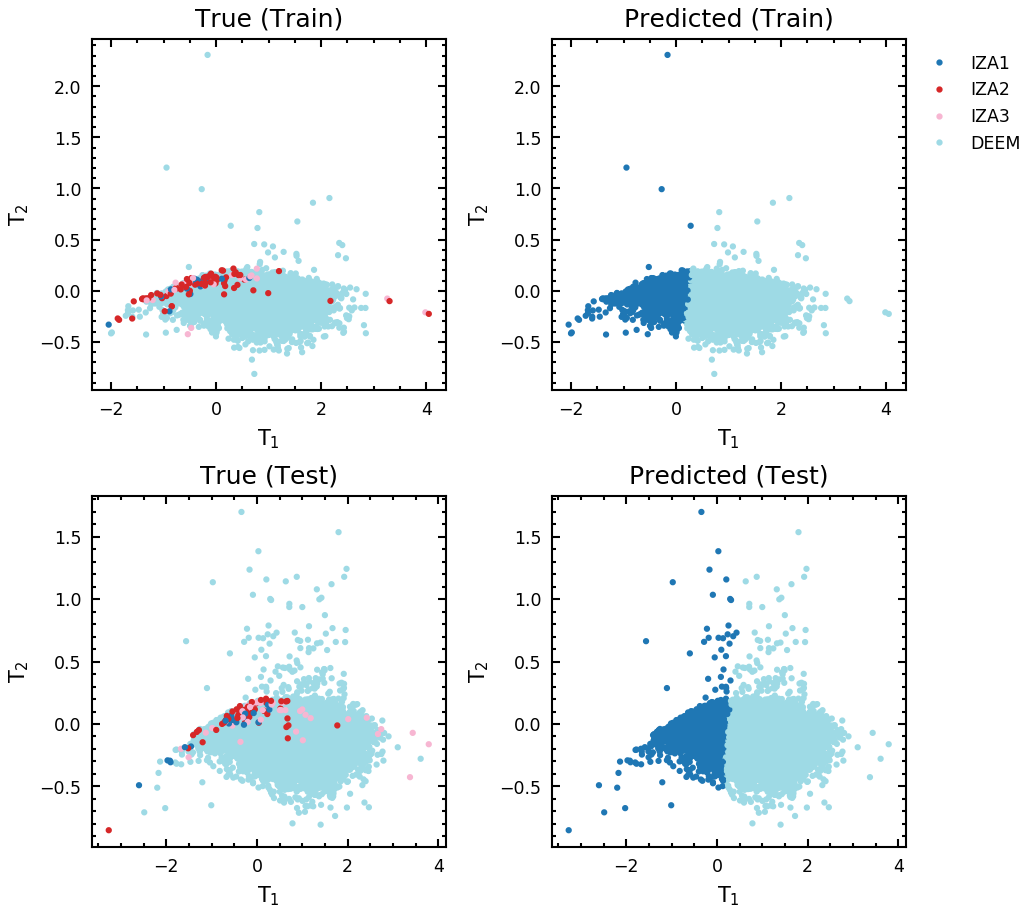

===== 3.5 | 4-Class | Radial | O+Si =====


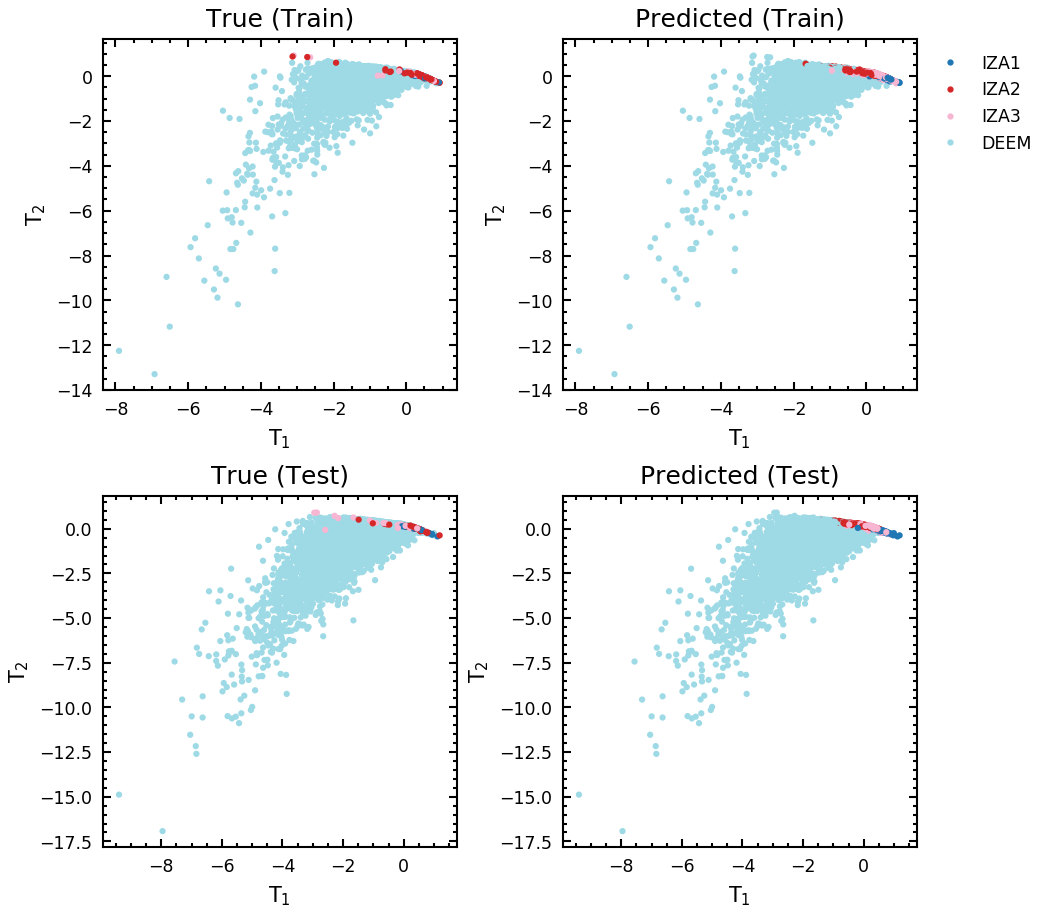

===== 6.0 | 4-Class | Power | OO =====


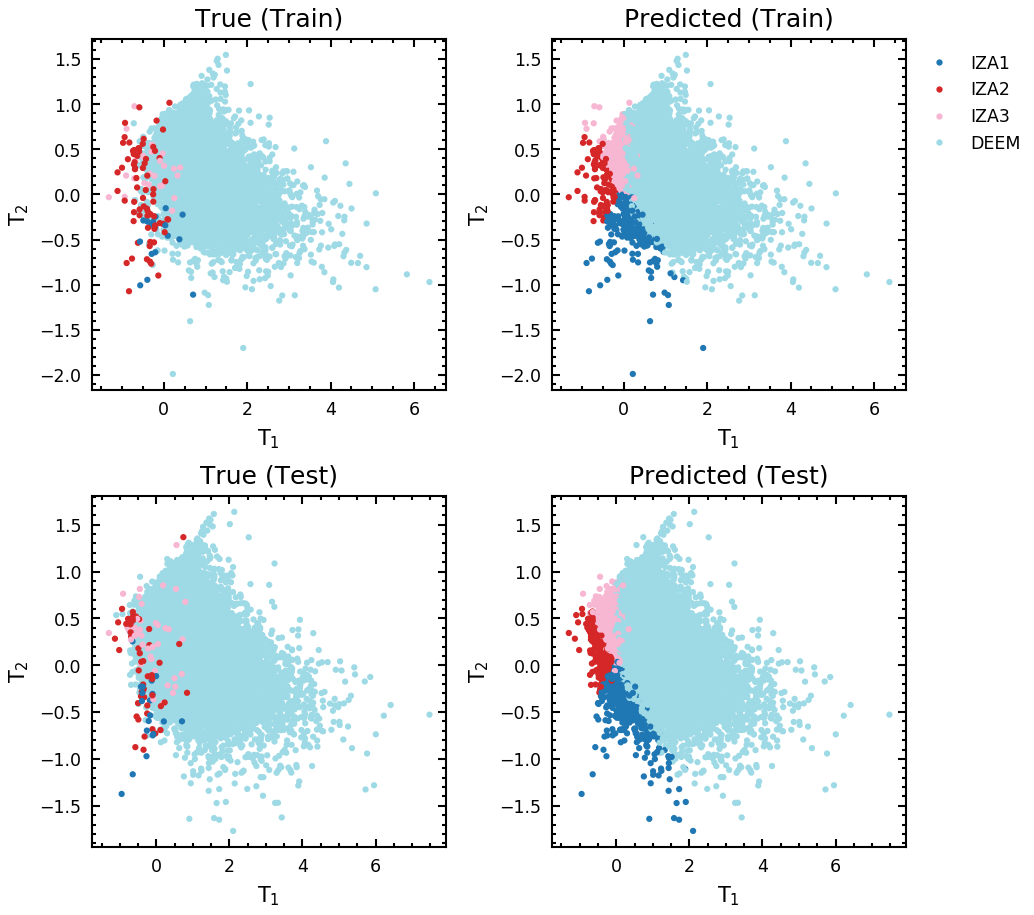

===== 6.0 | 4-Class | Power | OSi =====


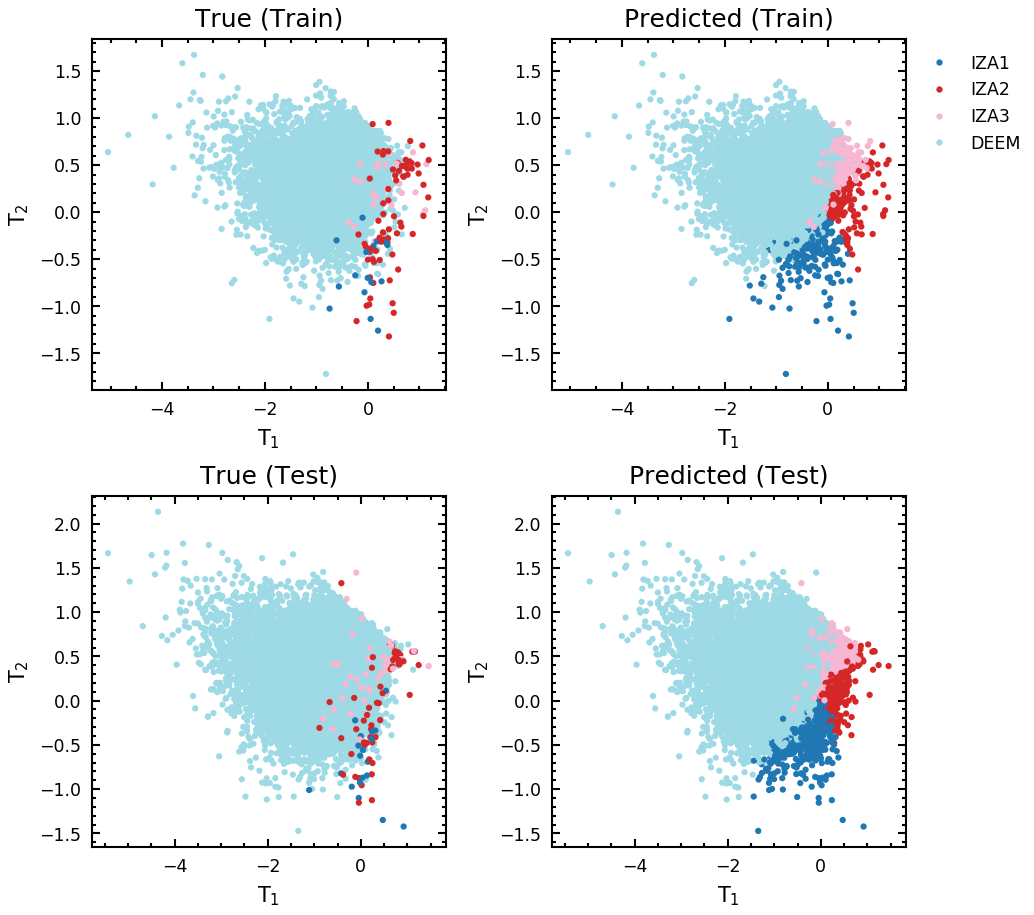

===== 6.0 | 4-Class | Power | SiSi =====


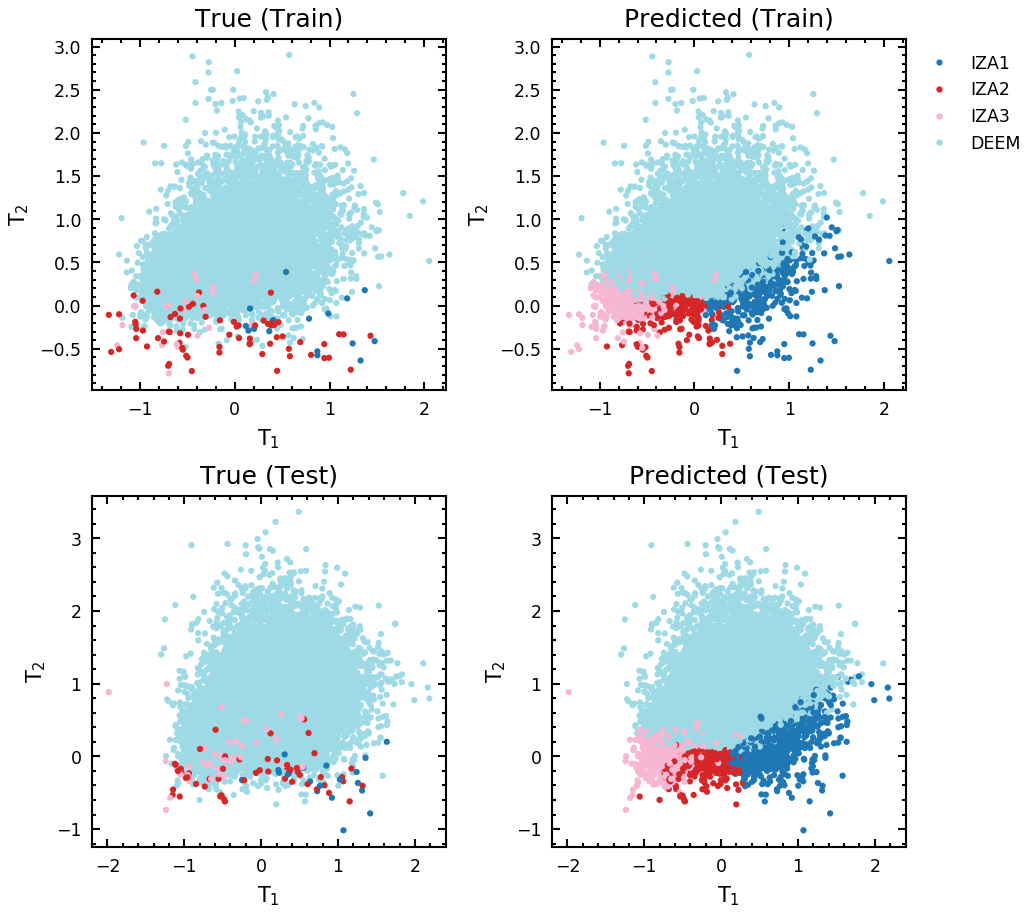

===== 6.0 | 4-Class | Power | OO+OSi =====


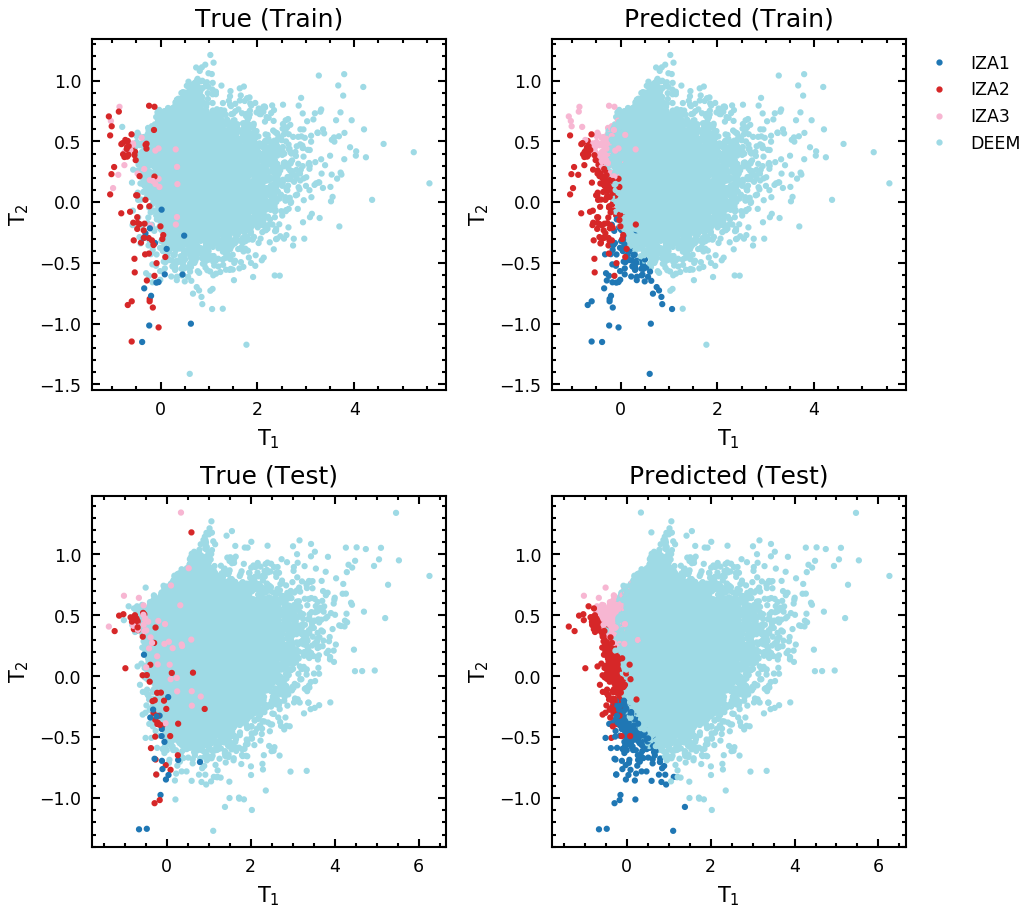

===== 6.0 | 4-Class | Power | OO+SiSi =====


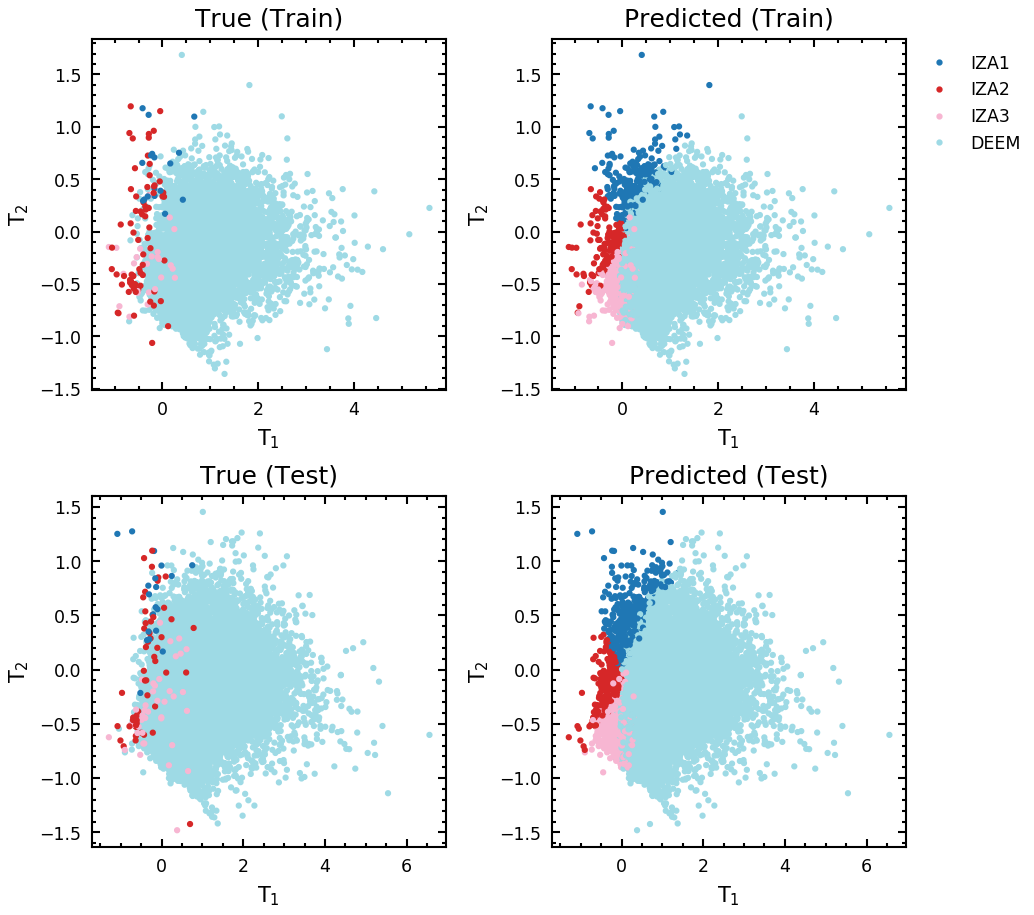

===== 6.0 | 4-Class | Power | OSi+SiSi =====


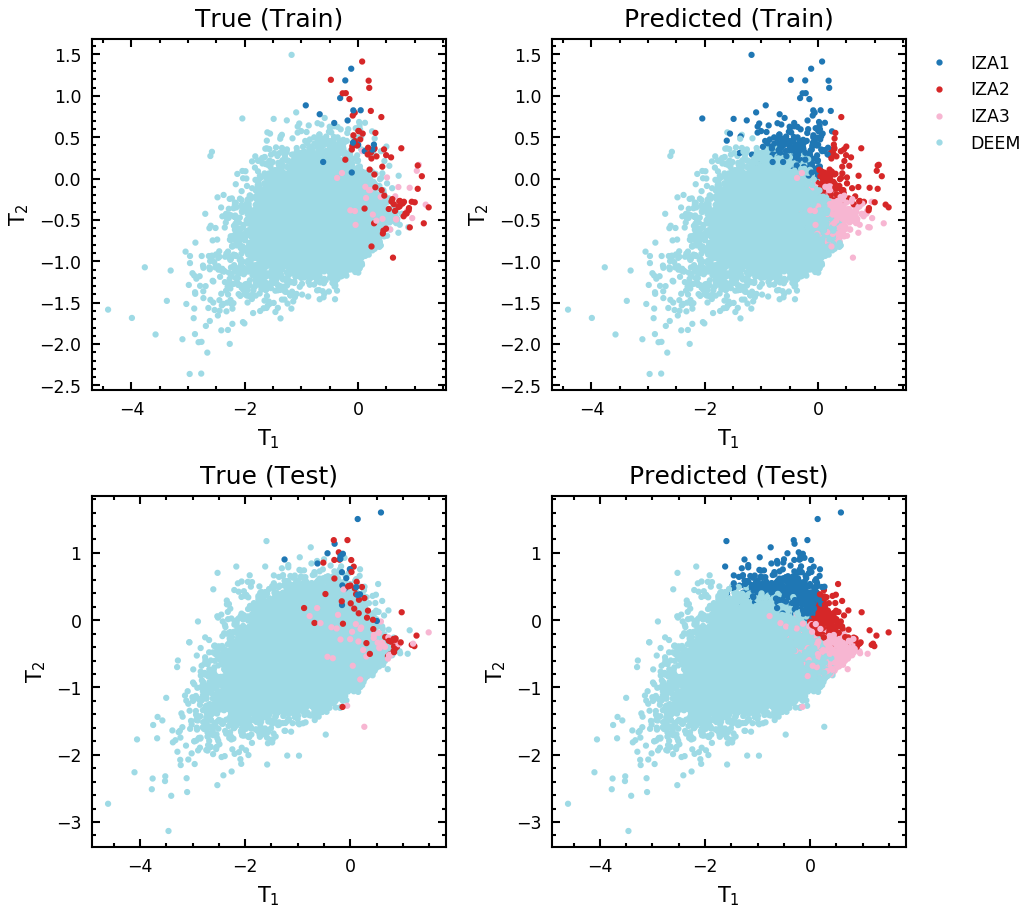

===== 6.0 | 4-Class | Power | OO+OSi+SiSi =====


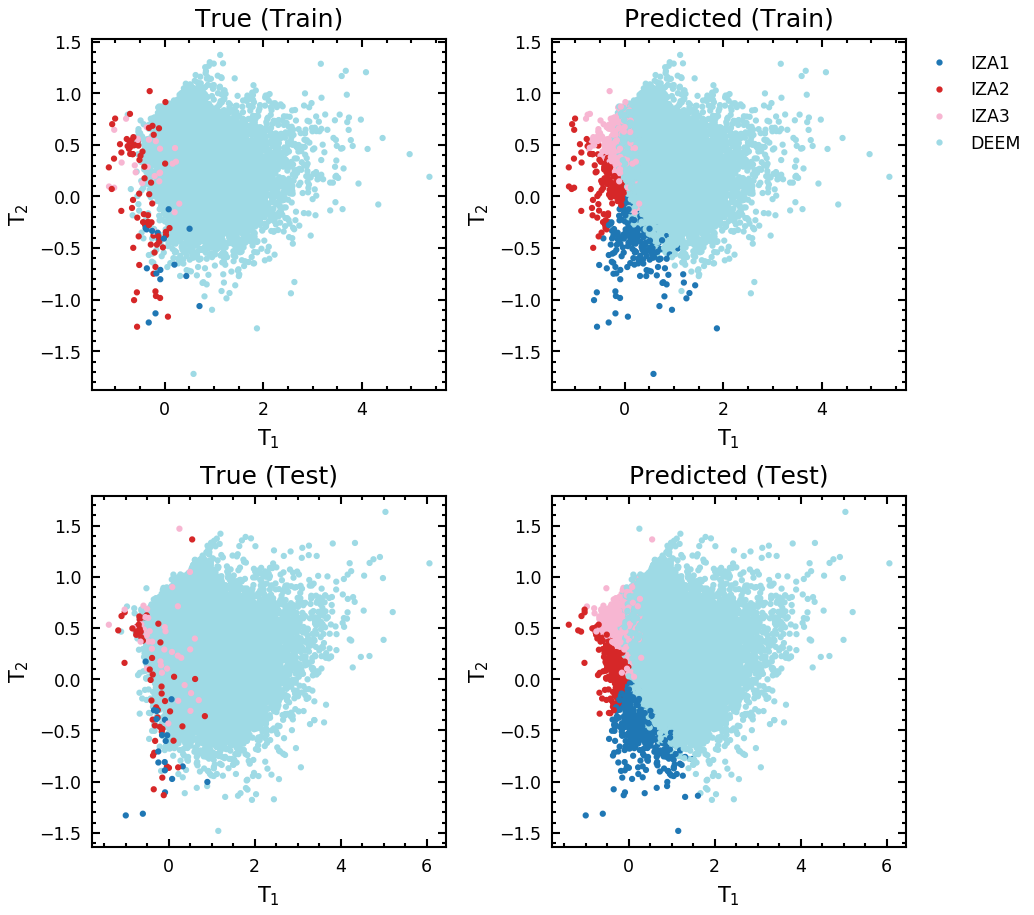

===== 6.0 | 4-Class | Radial | O =====


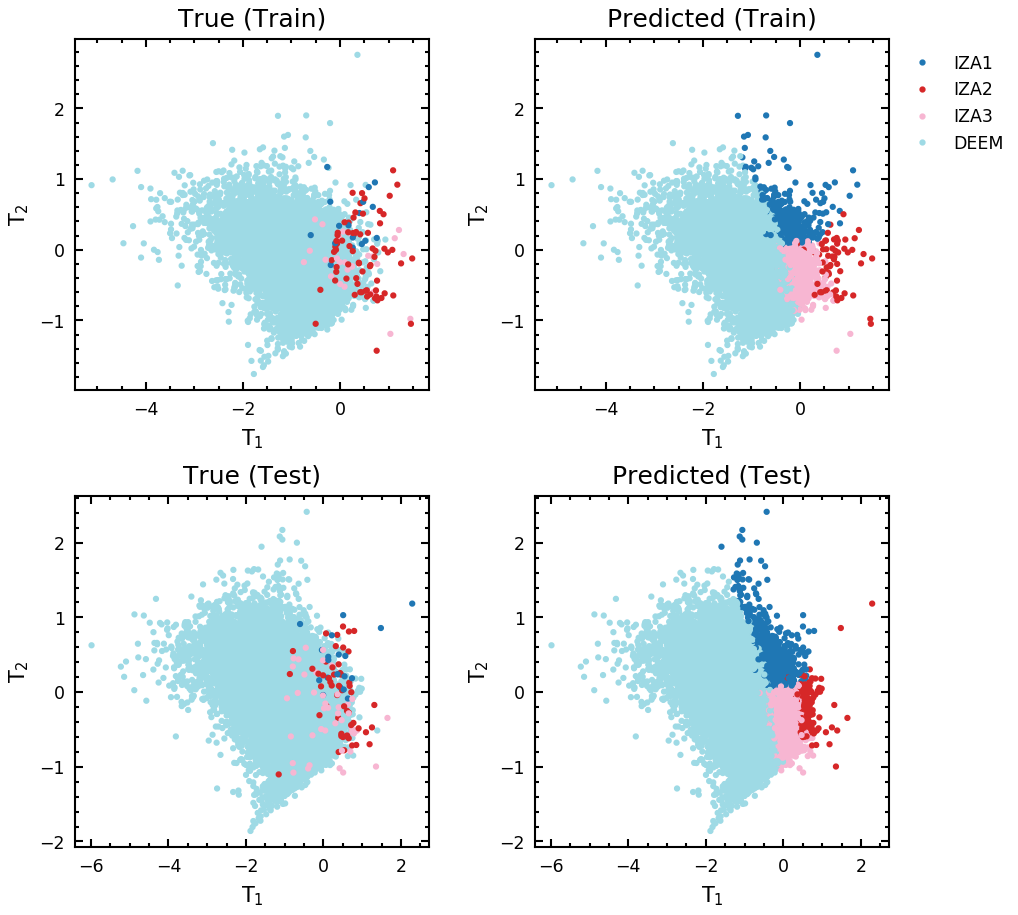

===== 6.0 | 4-Class | Radial | Si =====


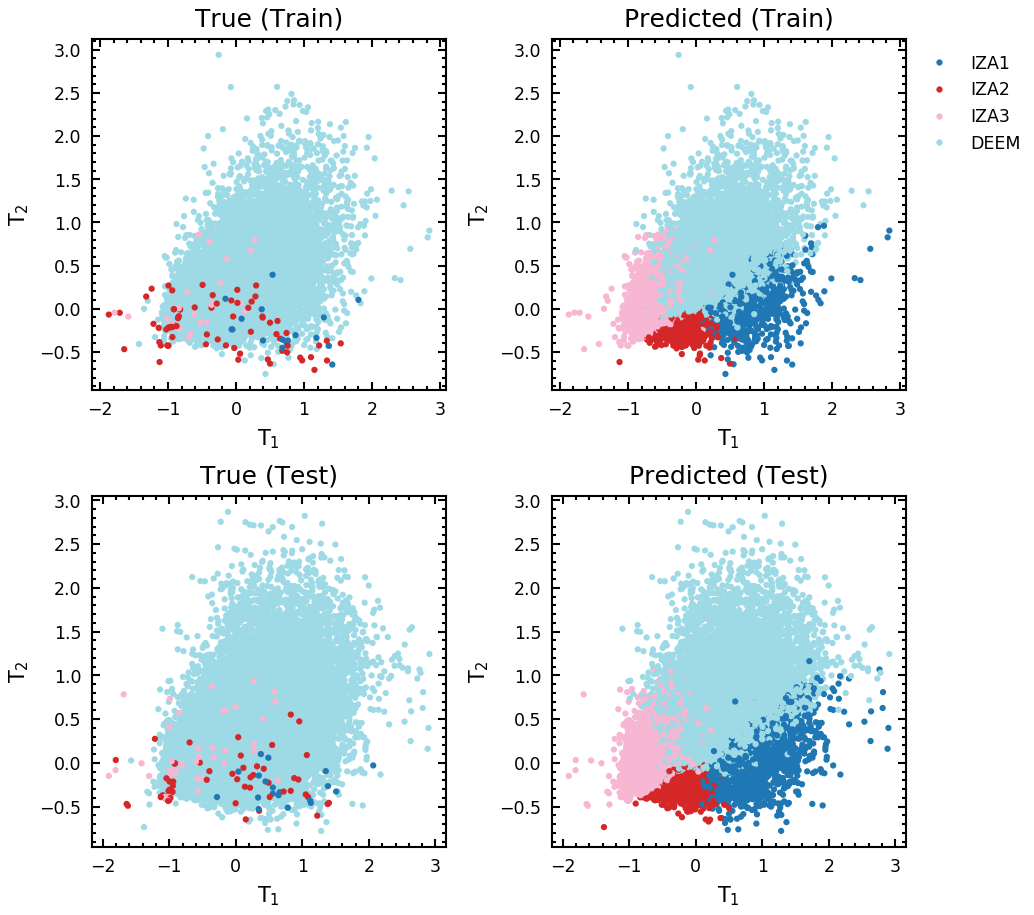

===== 6.0 | 4-Class | Radial | O+Si =====


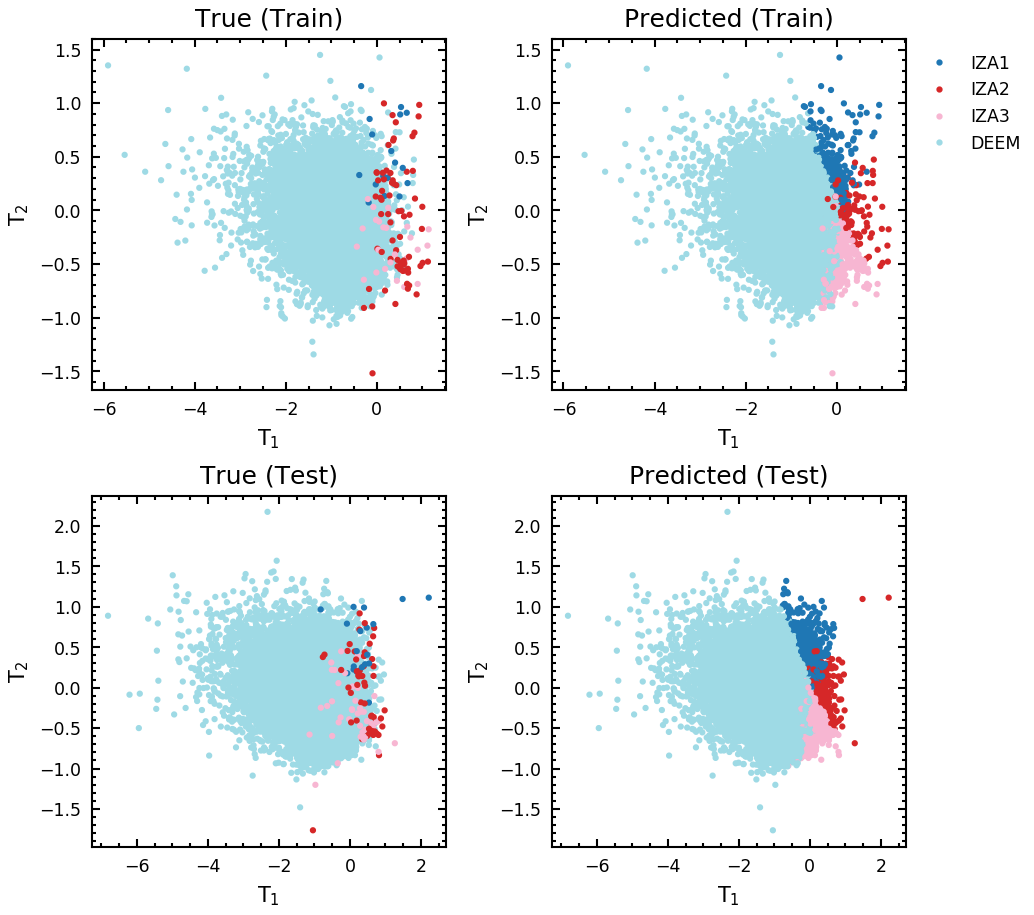

In [11]:
for df_type in df_types:
    print(f'##### {df_type} #####')
    for cutoff in cutoffs:
        for spectrum_type in ('power', 'radial'):
            spectrum_name = spectrum_type.capitalize()

            for species_pairing in group_names[spectrum_type]:

                for n_cantons in [4]: #(2, 4):

                    # Prepare outputs
                    data_dir = f'LPCovR/{df_type}/{n_cantons}-Class/{spectrum_name}/{species_pairing}'
                    output_dir = f'../../Results/{cutoff}/LPCovR/OvR/{n_cantons}-Class/{spectrum_name}/{species_pairing}'

    #                 os.makedirs(output_dir, exist_ok=True)

                    print(f'===== {cutoff} | {n_cantons}-Class | {spectrum_name} | {species_pairing} =====')

                    # Load projections
                    deem_file = f'{deem_dir}/{cutoff}/{data_dir}/pcovr_structure_projections{mixing}.hdf5'
                    T_deem = utils.load_hdf5(deem_file)[:, 0:2]

                    iza_file = f'{iza_dir}/{cutoff}/{data_dir}/pcovr_structure_projections{mixing}.hdf5'
                    T_iza = utils.load_hdf5(iza_file)[:, 0:2]

                    # Load predicted cantons
                    deem_file = f'{deem_dir}/{cutoff}/{data_dir}/pcovr_structure_cantons{mixing}.dat'
                    predicted_deem_cantons = np.loadtxt(deem_file, dtype=int)

                    iza_file = f'{iza_dir}/{cutoff}/{data_dir}/pcovr_structure_cantons{mixing}.dat'
                    predicted_iza_cantons = np.loadtxt(iza_file, dtype=int)

                    fig = plt.figure(figsize=(7.0, 7.0))
                    axs_true_train = fig.add_subplot(2, 2, 1)
                    axs_predicted_train = fig.add_subplot(2, 2, 2)
                    axs_true_test = fig.add_subplot(2, 2, 3)
                    axs_predicted_test = fig.add_subplot(2, 2, 4)
                    scatter_opts = dict(cmap='tab20', vmin=1, vmax=4)
                    df_idx = 0
                    plot_stride = 10

                    axs_true_train.scatter(
                        T_deem[deem_train_idxs, 0], 
                        T_deem[deem_train_idxs, 1], 
                        c=deem_cantons[deem_train_idxs], 
                        zorder=2, 
                        **scatter_opts
                    )
                    axs_true_train.scatter(
                        T_iza[iza_train_idxs, 0], 
                        T_iza[iza_train_idxs, 1], 
                        c=iza_cantons[iza_train_idxs], 
                        zorder=3, 
                        **scatter_opts
                    )

                    axs_predicted_train.scatter(
                        T_deem[deem_train_idxs, 0], 
                        T_deem[deem_train_idxs, 1], 
                        #c=df_deem_train[:, df_idx],
                        c=predicted_deem_cantons[deem_train_idxs], 
                        zorder=2, **scatter_opts
                    )
                    axs_predicted_train.scatter(
                        T_iza[iza_train_idxs, 0], 
                        T_iza[iza_train_idxs, 1], 
                        #c=df_iza_train[:, df_idx],
                        c=predicted_iza_cantons[iza_train_idxs], 
                        zorder=3, **scatter_opts
                    )

                    axs_true_test.scatter(
                        T_deem[deem_test_idxs[::plot_stride], 0], 
                        T_deem[deem_test_idxs[::plot_stride], 1],
                        c=deem_cantons[deem_test_idxs[::plot_stride]], 
                        zorder=2, 
                        **scatter_opts
                    )
                    axs_true_test.scatter(
                        T_iza[iza_test_idxs, 0], 
                        T_iza[iza_test_idxs, 1],
                        c=iza_cantons[iza_test_idxs], 
                        zorder=3, 
                        **scatter_opts
                    )

                    axs_predicted_test.scatter(
                        T_deem[deem_test_idxs[::plot_stride], 0], 
                        T_deem[deem_test_idxs[::plot_stride], 1],
                        #c=df_deem_test[:, df_idx])
                        c=predicted_deem_cantons[deem_test_idxs[::plot_stride]], 
                        zorder=2, 
                        **scatter_opts
                    )
                    axs_predicted_test.scatter(
                        T_iza[iza_test_idxs, 0], 
                        T_iza[iza_test_idxs, 1],
                        #c=df_iza_test[:, df_idx],
                        c=predicted_iza_cantons[iza_test_idxs], 
                        zorder=3, 
                        **scatter_opts
                    )

                    handles = [
                        Line2D([0], [0], c=plt.get_cmap('tab20')(0.0), marker='o', linewidth=0),
                        Line2D([0], [0], c=plt.get_cmap('tab20')(0.33), marker='o', linewidth=0),
                        Line2D([0], [0], c=plt.get_cmap('tab20')(0.67), marker='o', linewidth=0),
                        Line2D([0], [0], c=plt.get_cmap('tab20')(1.0), marker='o', linewidth=0)
                    ]

                    labels = ['IZA1', 'IZA2', 'IZA3', 'DEEM']
                    axs_predicted_train.legend(
                        handles=handles, 
                        labels=labels, 
                        loc='upper left', 
                        bbox_to_anchor=(1.0, 1.0)
                    )

                    for ax in (axs_true_train, axs_predicted_train, axs_true_test, axs_predicted_test):
                        ax.set_xlabel(r'T$_1$')
                        ax.set_ylabel(r'T$_2$')

                    axs_true_train.set_title('True (Train)')
                    axs_predicted_train.set_title('Predicted (Train)')
                    axs_true_test.set_title('True (Test)')
                    axs_predicted_test.set_title('Predicted (Test)')

                    fig.subplots_adjust(wspace=0.3, hspace=0.3)

                    #fig.savefig(f'{output_dir}/svm-kpcovr.png', bbox_inches='tight')

                    plt.show()

## Classification statistics

In [12]:
for df_type in df_types:
    print(f'##### {df_type} #####')
    for cutoff in cutoffs:
        for spectrum_type in ('power', 'radial'):
            spectrum_name = spectrum_type.capitalize()

            for species_pairing in group_names[spectrum_type]:

                for n_cantons in (2, 4):

                    # Prepare outputs
                    data_dir = f'{n_cantons}-Class/{spectrum_name}/{species_pairing}'

                    print(f'===== {cutoff} | {n_cantons}-Class | {spectrum_name} | {species_pairing} =====')            

                    predicted_iza_cantons = np.loadtxt(
                        f'{iza_dir}/{cutoff}/LPCovR/{df_type}/{data_dir}/pcovr_structure_cantons{mixing}.dat', dtype=int
                    )
                    predicted_deem_cantons = np.loadtxt(
                        f'{deem_dir}/{cutoff}/LPCovR/{df_type}/{data_dir}/pcovr_structure_cantons{mixing}.dat', dtype=int
                    )

                    predicted_train_cantons = np.concatenate((
                        predicted_iza_cantons[iza_train_idxs],
                        predicted_deem_cantons[deem_train_idxs]
                    ))
                    predicted_test_cantons = np.concatenate((
                        predicted_iza_cantons[iza_test_idxs],
                        predicted_deem_cantons[deem_test_idxs]
                    ))

                    iza_svc_dfs = np.loadtxt(f'{iza_dir}/{cutoff}/LSVC/{df_type}/{data_dir}/svc_structure_dfs.dat')
                    deem_svc_dfs = np.loadtxt(f'{deem_dir}/{cutoff}/LSVC/{df_type}/{data_dir}/svc_structure_dfs.dat')

                    iza_pcovr_dfs = np.loadtxt(f'{iza_dir}/{cutoff}/LPCovR/{df_type}/{data_dir}/pcovr_structure_dfs{mixing}.dat')
                    deem_pcovr_dfs = np.loadtxt(f'{deem_dir}/{cutoff}/LPCovR/{df_type}/{data_dir}/pcovr_structure_dfs{mixing}.dat')

                    svc_train_dfs = np.concatenate((
                        iza_svc_dfs[iza_train_idxs],
                        deem_svc_dfs[deem_train_idxs]
                    ))
                    svc_test_dfs = np.concatenate((
                        iza_svc_dfs[iza_test_idxs],
                        deem_svc_dfs[deem_test_idxs]
                    ))

                    pcovr_train_dfs = np.concatenate((
                        iza_pcovr_dfs[iza_train_idxs],
                        deem_pcovr_dfs[deem_train_idxs]
                    ))
                    pcovr_test_dfs = np.concatenate((
                        iza_pcovr_dfs[iza_test_idxs],
                        deem_pcovr_dfs[deem_test_idxs]
                    ))

                    matrix_train = confusion_matrix(train_cantons[n_cantons], predicted_train_cantons)
                    matrix_test = confusion_matrix(test_cantons[n_cantons], predicted_test_cantons)

                    print('----- Train -----')
                    print(
                        classification_report(
                            train_cantons[n_cantons], predicted_train_cantons, zero_division=0
                        )
                    )
                    print('Train accuracy:', balanced_accuracy_score(
                        train_cantons[n_cantons], predicted_train_cantons
                    ))
                    print()
                    print(matrix_train)
                    print()
                    print('Train DF RMSE:', mean_squared_error(svc_train_dfs, pcovr_train_dfs, squared=False))
                    print()

                    print('----- Test -----')
                    print(
                        classification_report(
                            test_cantons[n_cantons], predicted_test_cantons, zero_division=0
                        )
                    )
                    print('Test accuracy:', balanced_accuracy_score(
                        test_cantons[n_cantons], predicted_test_cantons
                    ))
                    print()
                    print(matrix_test)
                    print()
                    print('Test DF RMSE:', mean_squared_error(svc_test_dfs, pcovr_test_dfs, squared=False))
                    print()

##### OvR #####
===== 3.5 | 2-Class | Power | OO =====
----- Train -----
              precision    recall  f1-score   support

           1       0.11      0.98      0.19       114
           2       1.00      0.91      0.95      9999

    accuracy                           0.91     10113
   macro avg       0.55      0.94      0.57     10113
weighted avg       0.99      0.91      0.94     10113

Train accuracy: 0.9444233897073917

[[ 112    2]
 [ 936 9063]]

Train DF RMSE: 0.13744793173873132

----- Test -----
              precision    recall  f1-score   support

           1       0.00      0.88      0.01       115
           2       1.00      0.91      0.95    321082

    accuracy                           0.91    321197
   macro avg       0.50      0.89      0.48    321197
weighted avg       1.00      0.91      0.95    321197

Test accuracy: 0.8918901659416273

[[   101     14]
 [ 30336 290746]]

Test DF RMSE: 0.14246563656968983

===== 3.5 | 4-Class | Power | OO =====
----- Train

              precision    recall  f1-score   support

           1       0.00      0.74      0.00        19
           2       0.00      0.57      0.00        54
           3       0.00      0.02      0.00        42
           4       1.00      0.89      0.94    321082

    accuracy                           0.89    321197
   macro avg       0.25      0.56      0.24    321197
weighted avg       1.00      0.89      0.94    321197

Test accuracy: 0.5563745384494978

[[    14      4      0      1]
 [    19     31      1      3]
 [     5     27      1      9]
 [ 18347  15047   1677 286011]]

Test DF RMSE: 0.5988897562386533

===== 3.5 | 2-Class | Power | OO+SiSi =====
----- Train -----
              precision    recall  f1-score   support

           1       0.12      0.99      0.21       114
           2       1.00      0.92      0.96      9999

    accuracy                           0.92     10113
   macro avg       0.56      0.95      0.58     10113
weighted avg       0.99      0.92   

----- Train -----
              precision    recall  f1-score   support

           1       0.02      0.47      0.04        17
           2       0.06      0.42      0.11        71
           3       0.00      0.04      0.00        26
           4       1.00      0.84      0.91      9999

    accuracy                           0.84     10113
   macro avg       0.27      0.44      0.27     10113
weighted avg       0.99      0.84      0.90     10113

Train accuracy: 0.44324228085927575

[[   8    2    5    2]
 [  30   30    8    3]
 [   9   13    1    3]
 [ 378  436  772 8413]]

Train DF RMSE: 0.5774497844037567

----- Test -----
              precision    recall  f1-score   support

           1       0.00      0.68      0.00        19
           2       0.00      0.52      0.00        54
           3       0.00      0.14      0.00        42
           4       1.00      0.84      0.91    321082

    accuracy                           0.84    321197
   macro avg       0.25      0.55     

              precision    recall  f1-score   support

           1       0.01      0.89      0.01       115
           2       1.00      0.95      0.97    321082

    accuracy                           0.95    321197
   macro avg       0.50      0.92      0.49    321197
weighted avg       1.00      0.95      0.97    321197

Test accuracy: 0.9179193693714433

[[   102     13]
 [ 16413 304669]]

Test DF RMSE: 0.07971397271143017

===== 6.0 | 4-Class | Power | OSi =====
----- Train -----
              precision    recall  f1-score   support

           1       0.09      0.53      0.16        17
           2       0.16      0.55      0.25        71
           3       0.05      0.38      0.08        26
           4       1.00      0.96      0.98      9999

    accuracy                           0.95     10113
   macro avg       0.33      0.60      0.37     10113
weighted avg       0.99      0.95      0.97     10113

Train accuracy: 0.6048546333825275

[[   9    7    1    0]
 [  14   39   1

----- Train -----
              precision    recall  f1-score   support

           1       0.21      0.97      0.35       114
           2       1.00      0.96      0.98      9999

    accuracy                           0.96     10113
   macro avg       0.61      0.97      0.66     10113
weighted avg       0.99      0.96      0.97     10113

Train accuracy: 0.9661900400566372

[[ 111    3]
 [ 413 9586]]

Train DF RMSE: 0.08592890163047565

----- Test -----
              precision    recall  f1-score   support

           1       0.01      0.88      0.01       115
           2       1.00      0.95      0.98    321082

    accuracy                           0.95    321197
   macro avg       0.50      0.91      0.49    321197
weighted avg       1.00      0.95      0.97    321197

Test accuracy: 0.9147690566922766

[[   101     14]
 [ 15644 305438]]

Test DF RMSE: 0.08525848426878695

===== 6.0 | 4-Class | Power | OSi+SiSi =====
----- Train -----
              precision    recall  f1-scor

              precision    recall  f1-score   support

           1       0.00      0.79      0.00        19
           2       0.00      0.56      0.00        54
           3       0.00      0.29      0.00        42
           4       1.00      0.78      0.88    321082

    accuracy                           0.78    321197
   macro avg       0.25      0.60      0.22    321197
weighted avg       1.00      0.78      0.87    321197

Test accuracy: 0.6022545585304434

[[    15      2      1      1]
 [    18     30      2      4]
 [     2     16     12     12]
 [ 11194  40668  19330 249890]]

Test DF RMSE: 0.29331090964419076

===== 6.0 | 2-Class | Radial | O+Si =====
----- Train -----
              precision    recall  f1-score   support

           1       0.19      0.99      0.32       114
           2       1.00      0.95      0.98      9999

    accuracy                           0.95     10113
   macro avg       0.60      0.97      0.65     10113
weighted avg       0.99      0.95    

----- Train -----
              precision    recall  f1-score   support

           1       0.03      0.65      0.05        17
           2       0.03      0.21      0.05        71
           3       0.02      0.31      0.03        26
           4       1.00      0.86      0.92      9999

    accuracy                           0.86     10113
   macro avg       0.27      0.51      0.26     10113
weighted avg       0.98      0.86      0.91     10113

Train accuracy: 0.5073512688723465

[[  11    0    0    6]
 [  11   15   20   25]
 [   4    6    8    8]
 [ 371  533  462 8633]]

Train DF RMSE: 5.4844297873497

----- Test -----
              precision    recall  f1-score   support

           1       0.00      0.58      0.00        19
           2       0.00      0.06      0.00        54
           3       0.00      0.33      0.00        42
           4       1.00      0.87      0.93    321082

    accuracy                           0.87    321197
   macro avg       0.25      0.46      0.2

              precision    recall  f1-score   support

           1       0.01      0.88      0.01       115
           2       1.00      0.94      0.97    321082

    accuracy                           0.94    321197
   macro avg       0.50      0.91      0.49    321197
weighted avg       1.00      0.94      0.97    321197

Test accuracy: 0.9094915886311583

[[   101     14]
 [ 19033 302049]]

Test DF RMSE: 0.2331210055409554

===== 3.5 | 4-Class | Power | OO+OSi+SiSi =====
----- Train -----
              precision    recall  f1-score   support

           1       0.06      0.88      0.12        17
           2       0.06      0.66      0.11        71
           3       0.20      0.04      0.06        26
           4       1.00      0.91      0.95      9999

    accuracy                           0.91     10113
   macro avg       0.33      0.62      0.31     10113
weighted avg       0.99      0.91      0.94     10113

Train accuracy: 0.6229693049287084

[[  15    1    0    1]
 [  18  

----- Train -----
              precision    recall  f1-score   support

           1       0.30      1.00      0.46       114
           2       1.00      0.97      0.99      9999

    accuracy                           0.97     10113
   macro avg       0.65      0.99      0.72     10113
weighted avg       0.99      0.97      0.98     10113

Train accuracy: 0.9864486448644865

[[ 114    0]
 [ 271 9728]]

Train DF RMSE: 0.09868434102903624

----- Test -----
              precision    recall  f1-score   support

           1       0.01      0.88      0.02       115
           2       1.00      0.97      0.98    321082

    accuracy                           0.97    321197
   macro avg       0.50      0.92      0.50    321197
weighted avg       1.00      0.97      0.98    321197

Test accuracy: 0.9235705466543425

[[   101     14]
 [  9992 311090]]

Test DF RMSE: 0.09791422187780391

===== 6.0 | 4-Class | Power | OO =====
----- Train -----
              precision    recall  f1-score   su

              precision    recall  f1-score   support

           1       0.01      0.68      0.01        19
           2       0.01      0.54      0.02        54
           3       0.00      0.24      0.00        42
           4       1.00      0.97      0.98    321082

    accuracy                           0.97    321197
   macro avg       0.25      0.61      0.25    321197
weighted avg       1.00      0.97      0.98    321197

Test accuracy: 0.6066804627591609

[[    13      5      0      1]
 [    17     29      4      4]
 [     1     15     10     16]
 [  2232   3337   4905 310608]]

Test DF RMSE: 0.6436254640435699

===== 6.0 | 2-Class | Power | OO+SiSi =====
----- Train -----
              precision    recall  f1-score   support

           1       0.35      1.00      0.52       114
           2       1.00      0.98      0.99      9999

    accuracy                           0.98     10113
   macro avg       0.67      0.99      0.75     10113
weighted avg       0.99      0.98   

----- Train -----
              precision    recall  f1-score   support

           1       0.03      0.65      0.05        17
           2       0.45      0.39      0.42        71
           3       0.01      0.42      0.02        26
           4       1.00      0.87      0.93      9999

    accuracy                           0.86     10113
   macro avg       0.37      0.58      0.36     10113
weighted avg       0.99      0.86      0.92     10113

Train accuracy: 0.5835222256213257

[[  11    3    3    0]
 [  22   28   20    1]
 [   5    8   11    2]
 [ 378   23  903 8695]]

Train DF RMSE: 0.3115663833436398

----- Test -----
              precision    recall  f1-score   support

           1       0.00      0.53      0.00        19
           2       0.02      0.37      0.03        54
           3       0.00      0.36      0.00        42
           4       1.00      0.87      0.93    321082

    accuracy                           0.87    321197
   macro avg       0.25      0.53      

# Correlations of components with composition

In [89]:
spectrum_name = 'Power'
species_pairing = 'OO+OSi+SiSi'
mixing = ''
cutoff = 6.0
yticklabels = dict(
    OvR=['Composition', 'IZA vs. Deem', 'IZA1 vs. Rest', 'IZA2 vs. Rest', 'IZA3 vs. Rest', 'Deem vs. Rest'],
    OvO=['Composition', 'IZA vs. Deem', 'IZA1 vs. IZA2', 'IZA1 vs. IZA3', 'IZA1 vs. Deem', 'IZA2 vs. IZA3', 'IZA2 vs. Deem', 'IZA3 vs. Deem']
)
xticklabels = [r'PCov$_1$', r'PCov$_2$', r'PCov$_3$']

In [67]:
iza_cantons = np.loadtxt('../../Raw_Data/IZA_230/cantons_compositions.dat', usecols=1, dtype=int)[iza_test_idxs]
iza_compositions = np.loadtxt('../../Raw_Data/IZA_230/cantons_compositions.dat', usecols=2)[iza_test_idxs]

In [68]:
iza_sort_idxs = np.argsort(iza_test_idxs)
iza_unsort_idxs = np.argsort(iza_sort_idxs)

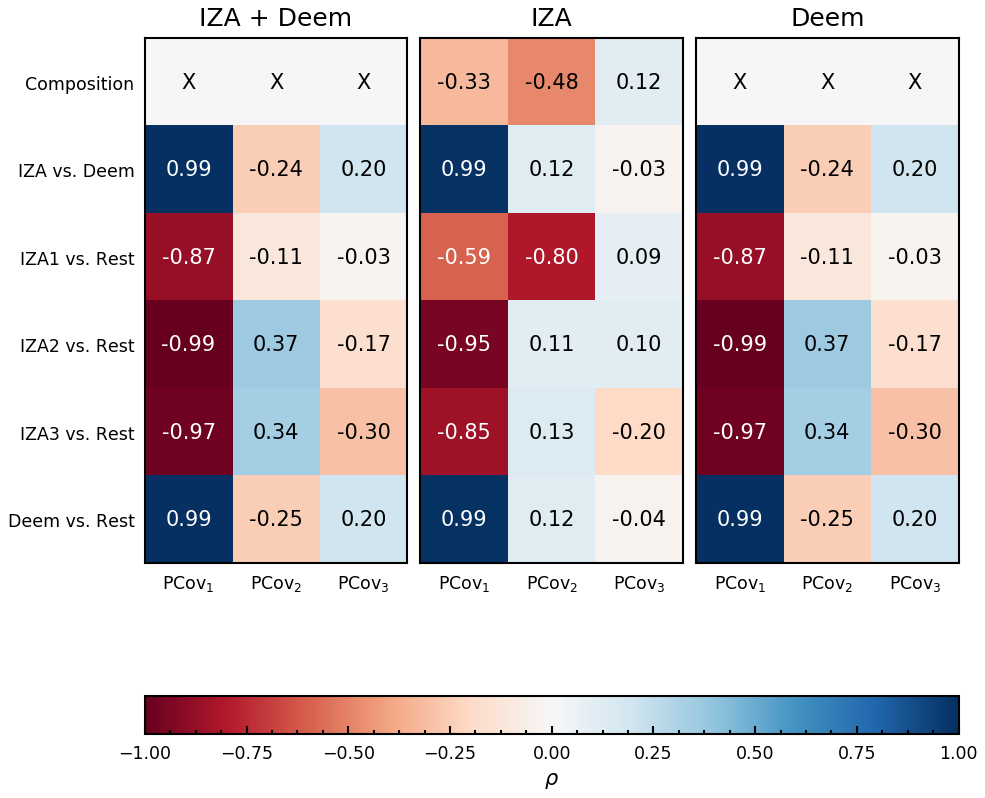

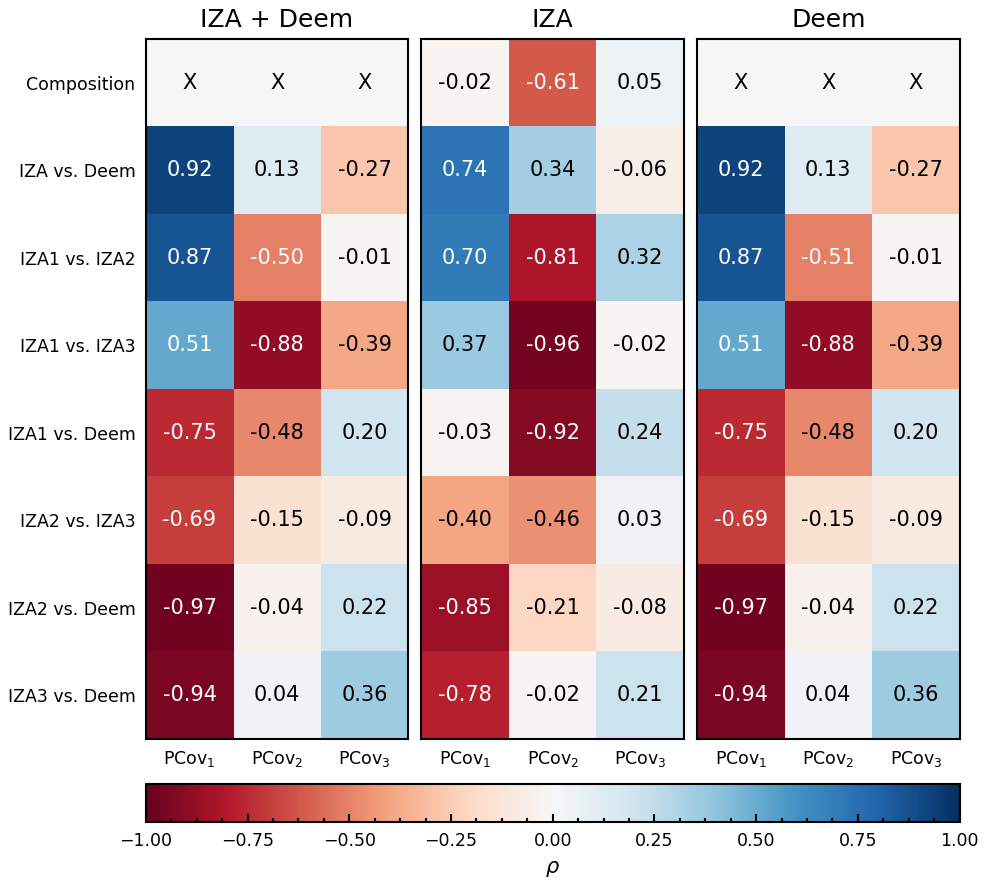

In [92]:
for df_type, n_dfs in zip(df_types, (4, 6)):
    
    fig = plt.figure(figsize=(7.0, 7.0))
    gs = fig.add_gridspec(
        nrows=2, ncols=3,
        width_ratios=(1.0, 1.0, 1.0), height_ratios=(1.0, 0.05),
        wspace=0.05, hspace=0.05
    )
    axs = fig.add_subplot(gs[0, 0])
    iza_axs = fig.add_subplot(gs[0, 1])
    deem_axs = fig.add_subplot(gs[0, 2])
    cb_axs = fig.add_subplot(gs[-1, :])
    
    # Decision functions
    deem_dfs_2 = np.loadtxt(
        f'{deem_dir}/{cutoff}/LSVC/{df_type}/2-Class/{spectrum_name}/{species_pairing}/svc_structure_dfs.dat'
    )[deem_test_idxs]
    deem_dfs_4 = np.loadtxt(
        f'{deem_dir}/{cutoff}/LSVC/{df_type}/4-Class/{spectrum_name}/{species_pairing}/svc_structure_dfs.dat'
    )[deem_test_idxs]

    iza_dfs_2 = np.loadtxt(
        f'{iza_dir}/{cutoff}/LSVC/{df_type}/2-Class/{spectrum_name}/{species_pairing}/svc_structure_dfs.dat'
    )[iza_test_idxs]
    iza_dfs_4 = np.loadtxt(
        f'{iza_dir}/{cutoff}/LSVC/{df_type}/4-Class/{spectrum_name}/{species_pairing}/svc_structure_dfs.dat'
    )[iza_test_idxs]
    
    dfs_2 = np.concatenate((iza_dfs_2, deem_dfs_2))
    dfs_4 = np.concatenate((iza_dfs_4, deem_dfs_4))
    
    # PCovR Projections
    T_deem = utils.load_hdf5(
        f'{deem_dir}/{cutoff}/LPCovR/{df_type}/4-Class/{spectrum_name}/{species_pairing}/pcovr_structure_projections{mixing}.hdf5',
        indices=deem_test_idxs
    )

    T_iza = utils.load_hdf5(
        f'{iza_dir}/{cutoff}/LPCovR/{df_type}/4-Class/{spectrum_name}/{species_pairing}/pcovr_structure_projections{mixing}.hdf5',
        indices=iza_test_idxs[iza_sort_idxs]
    )[iza_unsort_idxs]
    
    T = np.concatenate((T_iza, T_deem))
    
    iza_data_matrix = np.zeros((2+n_dfs, T_iza.shape[1]))
    deem_data_matrix = np.zeros((2+n_dfs, T_deem.shape[1]))
    data_matrix = np.zeros((2+n_dfs, T.shape[1]))
        
    # Correlations with composition
    for i in range(0, T_iza.shape[1]):
        iza_data_matrix[0, i], _ = pearsonr(T_iza[:, i], iza_compositions)
        
    # Correlations with 2-class decision functions
    for i in range(0, T_iza.shape[1]):
        iza_data_matrix[1, i] = pearsonr(T_iza[:, i], iza_dfs_2)[0]
        deem_data_matrix[1, i] = pearsonr(T_deem[:, i], deem_dfs_2)[0]
        data_matrix[1, i] = pearsonr(T[:, i], dfs_2)[0]
    
    # Correlations with 4-class decision functions
    for n in range(0, iza_dfs_4.shape[1]):
        for i in range(0, T_iza.shape[1]):
            iza_data_matrix[2+n, i] = pearsonr(T_iza[:, i], iza_dfs_4[:, n])[0]
            deem_data_matrix[2+n, i] = pearsonr(T_deem[:, i], deem_dfs_4[:, n])[0]
            data_matrix[2+n, i] = pearsonr(T[:, i], dfs_4[:, n])[0]
     
    norm = DivergingNorm(vmin=-1.0, vmax=1.0, vcenter=0.0)
    color_map = ScalarMappable(norm=norm, cmap='RdBu')
    cb = fig.colorbar(color_map, cax=cb_axs, orientation='horizontal', label=r'$\rho$')
    
    axs.imshow(data_matrix, norm=norm, cmap='RdBu')
    iza_axs.imshow(iza_data_matrix, norm=norm, cmap='RdBu')
    deem_axs.imshow(deem_data_matrix, norm=norm, cmap='RdBu')
    
    axs.set_title('IZA + Deem')
    iza_axs.set_title('IZA')
    deem_axs.set_title('Deem')
    
    axs.set_yticks(np.arange(0, len(yticklabels[df_type])))
    axs.set_yticklabels(yticklabels[df_type])

    for ax, mat in zip([axs, iza_axs, deem_axs], [data_matrix, iza_data_matrix, deem_data_matrix]):
        ax.set_xticks(np.arange(0, len(xticklabels)))
        ax.set_xticklabels(xticklabels)
        ax.tick_params(axis='both', which='both', left=False, right=False, top=False, bottom=False)
        for i in range(0, mat.shape[0]):
            for j in range(0, mat.shape[1]):
                if i == 0 and ax != iza_axs:
                    txt = 'X'
                else:
                    txt = f'{mat[i, j]:0.2f}'
                    
                if mat[i, j] > 0.50 or mat[i, j] < -0.50:
                    textcolor='w'
                else:
                    textcolor='k'
                ax.text(
                    j, i,
                    txt,
                    horizontalalignment='center',
                    verticalalignment='center',
                    color=textcolor
                )
        
    for ax in [iza_axs, deem_axs]:
        ax.tick_params(axis='y', labelleft=False)

    plt.show()